In [358]:
#importing packages

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestRegressor

In [359]:
#importing our dataset
df = pd.read_excel('1. Data.xlsx', sheet_name='VU')
df.head()

Глубина манометра    Dшт  Руст(ср)  Рзаб(ср)  Pлин(ср)  Руст(кон)  \
0             3576.3   7.94     249.6     370.1     101.8      249.0   
1             3576.3   9.53     233.5     364.6     101.3      249.0   
2             3576.3  11.11     213.4     357.1     101.6      211.0   
3             3576.3  12.70     191.6     347.4      98.4      187.0   
4             3576.3  14.29     171.9     337.7      99.2      169.0   

   Рзаб(кон)  Рлин(кон)  Туст  Тна шлейфе   Тзаб  Tлин  Дебит газа(ст)  \
0      359.6      101.8  53.0        31.7  103.2  32.5         214.704   
1      338.1      102.4  58.8        37.6  103.0  38.6         290.594   
2      314.8      100.6  63.6        42.8  102.6  43.4         368.042   
3      291.5       99.0  64.7        46.2  102.0  46.1         434.663   
4      270.3       99.5  64.0        49.4  104.4  49.9         483.283   

   Дебит ст. конд.(ст)  Дебит воды(ст)  Дебит смеси(ст)  Дебит газа(лин)  \
0                 83.6             0.4        231.24884      1610.368866   
1                104.7             1.4        309.00166      2310.226429   
2                114.3             1.9        388.11498      3039.489680   
3                121.3             3.3        455.21452      3824.082686   
4                129.8             4.6        504.58778      4299.104676   

   Дебит кон нестабильный(лин)  Дебит воды(лин)   Нэф  \
0                        131.3              0.4  56.8   
1                        158.5              1.4  56.8   
2                        172.3              1.9  56.8   
3                        181.5              3.3  56.8   
4                        190.6              4.7  56.8   

   Рпл. Тек (послед точка на КВД)  Рпл. Тек (Расчет по КВД)  \
0                           45.25                      56.5   
1                           45.25                      56.5   
2                           45.25                      56.5   
3                           45.25                      56.5   
4                           45.25                      56.5   

   Рпл. Тек (Карноухов)   Pсб      Ro_g   Ro_c    Ro_w  \
0                   NaN  93.6  0.806017  801.0  1000.0   
1                   NaN  92.9  0.806017  801.0  1000.0   
2                   NaN  91.4  0.806017  801.0  1000.0   
3                   NaN  89.2  0.806017  801.0  1000.0   
4                   NaN  89.7  0.806017  801.0  1000.0   

   Удельная плотность газа    G_total       КГФ  
0                  0.669449  2.782623  311.9094  
1                  0.669449  3.697781  288.6003  
2                  0.669449  4.515073  248.7906  
3                  0.669449  5.217673  223.5591  
4                  0.669449  5.765092  215.1486

In [360]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 93 entries, 0 to 92
Data columns (total 30 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   Глубина манометра               90 non-null     float64
 1   Dшт                             93 non-null     float64
 2   Руст(ср)                        93 non-null     float64
 3   Рзаб(ср)                        90 non-null     float64
 4   Pлин(ср)                        93 non-null     float64
 5   Руст(кон)                       93 non-null     float64
 6   Рзаб(кон)                       90 non-null     float64
 7   Рлин(кон)                       93 non-null     float64
 8   Туст                            93 non-null     float64
 9   Тна шлейфе                      60 non-null     float64
 10  Тзаб                            90 non-null     float64
 11  Tлин                            93 non-null     float64
 12  Дебит газа(ст)                  93 non

## Dropping G_total because it is the same as KGF. Only the unit measurement is different.

In [361]:
#dropping G_total because it has many missing values and if KGF and G_total only defer in unit of measurement, KGF can represent them as it has no missing values.
dropped_feats = {}
dropped_feats['G_total'] = 'it has many missing values and KGF and G_total only defer in unit of measurement'

df = df.drop(columns=['G_total'])
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 93 entries, 0 to 92
Data columns (total 29 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   Глубина манометра               90 non-null     float64
 1   Dшт                             93 non-null     float64
 2   Руст(ср)                        93 non-null     float64
 3   Рзаб(ср)                        90 non-null     float64
 4   Pлин(ср)                        93 non-null     float64
 5   Руст(кон)                       93 non-null     float64
 6   Рзаб(кон)                       90 non-null     float64
 7   Рлин(кон)                       93 non-null     float64
 8   Туст                            93 non-null     float64
 9   Тна шлейфе                      60 non-null     float64
 10  Тзаб                            90 non-null     float64
 11  Tлин                            93 non-null     float64
 12  Дебит газа(ст)                  93 non

## Saving feature names to a list

In [362]:
feature_names = df.columns.to_list()
feature_names

['Глубина манометра',
 'Dшт',
 'Руст(ср)',
 'Рзаб(ср)',
 'Pлин(ср)',
 'Руст(кон)',
 'Рзаб(кон)',
 'Рлин(кон)',
 'Туст',
 'Тна шлейфе',
 'Тзаб',
 'Tлин',
 'Дебит газа(ст)',
 'Дебит ст. конд.(ст)',
 'Дебит воды(ст)',
 'Дебит смеси(ст)',
 'Дебит газа(лин)',
 'Дебит кон нестабильный(лин)',
 'Дебит воды(лин)',
 'Нэф',
 'Рпл. Тек (послед точка на КВД)',
 'Рпл. Тек (Расчет по КВД)',
 'Рпл. Тек (Карноухов)',
 'Pсб',
 'Ro_g',
 'Ro_c',
 'Ro_w',
 'Удельная плотность газа ',
 'КГФ']

## Descriptive Statistics

In [363]:
df.describe()

Глубина манометра        Dшт    Руст(ср)    Рзаб(ср)    Pлин(ср)  \
count          90.000000  93.000000   93.000000   90.000000   93.000000   
mean         3524.086667  10.951183  228.293412  331.762255   99.860962   
std           144.474862   2.423172   41.897238   56.481235    7.300663   
min          3276.000000   6.350000  138.157895  174.000000   73.306638   
25%          3427.625000   9.530000  201.636750  297.797500   95.945951   
50%          3579.000000  11.110000  229.894737  337.789172  100.800000   
75%          3652.250000  12.700000  252.000000  364.150000  103.865199   
max          3670.000000  15.880000  337.108108  458.600000  121.682930   

        Руст(кон)   Рзаб(кон)   Рлин(кон)       Туст  Тна шлейфе        Тзаб  \
count   93.000000   90.000000   93.000000  93.000000   60.000000   90.000000   
mean   227.837817  330.334444   98.005453  56.172043   43.091667  104.961400   
std     41.814527   56.357493   12.425851  11.250781   19.602337    1.250941   
min    136.000000  174.000000   40.739839  24.200000   14.000000  100.210000   
25%    200.000000  294.625000   95.335032  50.300000   33.300000  104.525000   
50%    228.000000  334.250000  100.260000  58.000000   38.700000  105.110000   
75%    252.000000  362.150000  104.000000  64.000000   46.375000  105.567500   
max    333.000000  458.500000  123.616800  75.000000  110.200000  107.071000   

            Tлин  Дебит газа(ст)  Дебит ст. конд.(ст)  Дебит воды(ст)  \
count  93.000000       93.000000            93.000000       93.000000   
mean   39.798184      394.402772            99.909533        2.132827   
std     8.937669      150.354801            49.140664        1.874972   
min    16.204686      128.365641            33.629767        0.000000   
25%    33.688653      287.950295            69.900000        0.700000   
50%    40.519491      383.719622            89.800000        1.400000   
75%    47.800000      489.673000           117.600000        3.200000   
max    55.513904      846.816143           302.621077        8.340288   

       Дебит смеси(ст)  Дебит газа(лин)  Дебит кон нестабильный(лин)  \
count        89.000000        93.000000                    93.000000   
mean        417.021121      3282.971050                   164.151613   
std         157.746532      1353.043667                    85.225100   
min         136.815245       884.000000                    59.800000   
25%         306.243434      2223.000000                   116.800000   
50%         401.391397      3112.000000                   143.500000   
75%         509.046953      4165.000000                   185.200000   
max         896.908271      6943.100000                   492.800000   

       Дебит воды(лин)        Нэф  Рпл. Тек (послед точка на КВД)  \
count        93.000000  93.000000                       88.000000   
mean          2.163441  52.703325                       40.682881   
std           1.903132  12.149424                        5.374353   
min           0.000000  30.000000                       29.170000   
25%           0.700000  44.200000                       37.210000   
50%           1.400000  56.800000                       39.466050   
75%           3.300000  63.500000                       42.860000   
max           8.100000  72.539800                       53.270000   

       Рпл. Тек (Расчет по КВД)  Рпл. Тек (Карноухов)         Pсб       Ro_g  \
count                 81.000000             64.000000   93.000000  23.000000   
mean                  50.943684             50.773438   95.162366   0.807631   
std                    4.378416              4.006591    5.136060   0.015076   
min                   39.900000             41.600000   85.500000   0.787416   
25%                   48.300000             49.425000   90.700000   0.787416   
50%                   50.800000             50.900000   94.200000   0.806017   
75%                   55.400000             52.700000   99.800000   0.821344   
max                   56.700000          

### The above table is missing some key elements of statistics so we preform them manually.

In [364]:
def descriptive_stats(df):
    #adding additional statsical parameters to check our data
    C = len(df.columns)
    L = len(df.index)
    CN = df.count()
    NP = ((L-CN)/L)*100
    MN = df.min()
    Q1 = df.quantile(q=0.25)
    MA=df.mean() 
    ME=df.median() 
    Q3=df.quantile(q=0.75) 
    MX=df.max() 
    ST=df.std() 
    P=df.nunique() 
    IQ=Q3-Q1 

    frame = pd.concat([CN, NP, MN, Q1, MA, ME, Q3, MX, ST, P, IQ], axis=1, join="inner")
    frame=frame.T
    f=pd.DataFrame(frame)
    f.index=['Количество', 'Процент пропусков', 'Минимум', 'Первый квартиль','Среднее', 'Медиана', 'Третий квартиль', 'Максимум','Стандартное отклонение', 'Мощность', 'Интерквартильный размах']
    pd.set_option('display.max_rows', None)
    pd.set_option('display.max_columns', None)
    pd.set_option('display.width', None)
    f1=f.style.apply(lambda x: ["background-color:tomato" if i==1 else "" for i in x], axis=1, subset=(["Мощность"], slice(None))).apply(lambda x: ["background-color:tomato" if i>=60 else "" for i in x], axis=1, subset=(["Процент пропусков"], slice(None))).apply(lambda x: ["background-color:steelblue" if (i<30 and i>0) else "" for i in x], axis=1, subset=(["Процент пропусков"], slice(None))).apply(lambda x: ["background-color:limegreen" if i==0 else "" for i in x], axis=1, subset=(["Процент пропусков"], slice(None)))
    return f,f1

f,f1 = descriptive_stats(df)
f1

In [365]:
#removing features with too many missing values and whose power is 1
dropped_feats['Ro_g'] = 'Has too many missing elements'
dropped_feats['Ro_w'] = 'Has a power of 1 and many missing elements'
df = df.drop(columns=['Ro_g','Ro_w'])
df.head()

Глубина манометра    Dшт  Руст(ср)  Рзаб(ср)  Pлин(ср)  Руст(кон)  \
0             3576.3   7.94     249.6     370.1     101.8      249.0   
1             3576.3   9.53     233.5     364.6     101.3      249.0   
2             3576.3  11.11     213.4     357.1     101.6      211.0   
3             3576.3  12.70     191.6     347.4      98.4      187.0   
4             3576.3  14.29     171.9     337.7      99.2      169.0   

   Рзаб(кон)  Рлин(кон)  Туст  Тна шлейфе   Тзаб  Tлин  Дебит газа(ст)  \
0      359.6      101.8  53.0        31.7  103.2  32.5         214.704   
1      338.1      102.4  58.8        37.6  103.0  38.6         290.594   
2      314.8      100.6  63.6        42.8  102.6  43.4         368.042   
3      291.5       99.0  64.7        46.2  102.0  46.1         434.663   
4      270.3       99.5  64.0        49.4  104.4  49.9         483.283   

   Дебит ст. конд.(ст)  Дебит воды(ст)  Дебит смеси(ст)  Дебит газа(лин)  \
0                 83.6             0.4        231.24884      1610.368866   
1                104.7             1.4        309.00166      2310.226429   
2                114.3             1.9        388.11498      3039.489680   
3                121.3             3.3        455.21452      3824.082686   
4                129.8             4.6        504.58778      4299.104676   

   Дебит кон нестабильный(лин)  Дебит воды(лин)   Нэф  \
0                        131.3              0.4  56.8   
1                        158.5              1.4  56.8   
2                        172.3              1.9  56.8   
3                        181.5              3.3  56.8   
4                        190.6              4.7  56.8   

   Рпл. Тек (послед точка на КВД)  Рпл. Тек (Расчет по КВД)  \
0                           45.25                      56.5   
1                           45.25                      56.5   
2                           45.25                      56.5   
3                           45.25                      56.5   
4                           45.25                      56.5   

   Рпл. Тек (Карноухов)   Pсб   Ro_c  Удельная плотность газа        КГФ  
0                   NaN  93.6  801.0                  0.669449  311.9094  
1                   NaN  92.9  801.0                  0.669449  288.6003  
2                   NaN  91.4  801.0                  0.669449  248.7906  
3                   NaN  89.2  801.0                  0.669449  223.5591  
4                   NaN  89.7  801.0                  0.669449  215.1486

In [366]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 93 entries, 0 to 92
Data columns (total 27 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   Глубина манометра               90 non-null     float64
 1   Dшт                             93 non-null     float64
 2   Руст(ср)                        93 non-null     float64
 3   Рзаб(ср)                        90 non-null     float64
 4   Pлин(ср)                        93 non-null     float64
 5   Руст(кон)                       93 non-null     float64
 6   Рзаб(кон)                       90 non-null     float64
 7   Рлин(кон)                       93 non-null     float64
 8   Туст                            93 non-null     float64
 9   Тна шлейфе                      60 non-null     float64
 10  Тзаб                            90 non-null     float64
 11  Tлин                            93 non-null     float64
 12  Дебит газа(ст)                  93 non

## Building a heatmap 

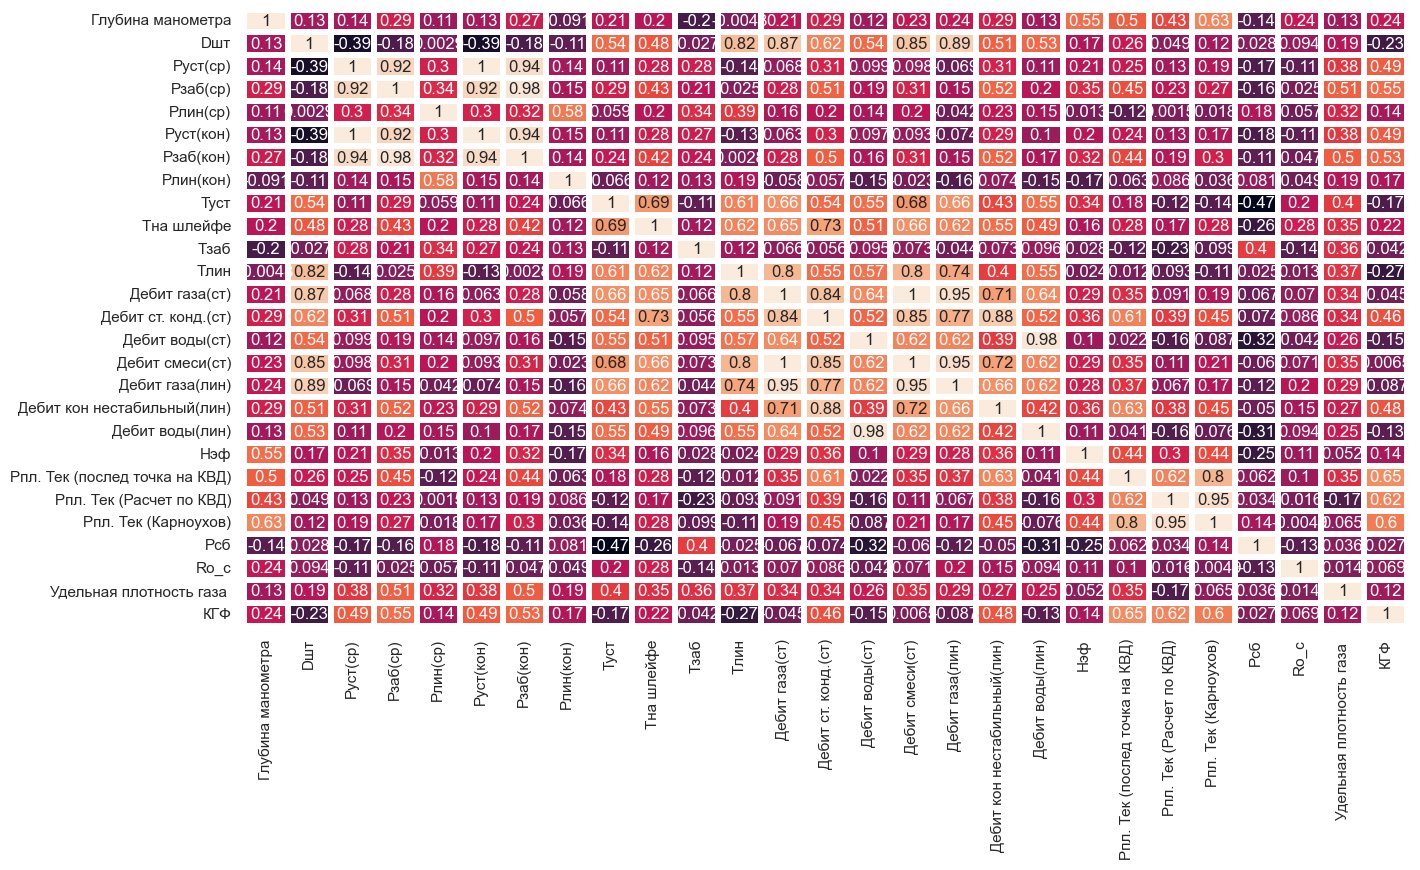

In [367]:
def make_heat_map(df):
    sns.set(rc={'figure.figsize': (15,8),})
    sns.heatmap(df.corr(), annot=True, linewidths=3, cbar=False)

make_heat_map(df)

## Feature importance based on the gain ratio criterion

c:\Users\mewie\anaconda3\Lib\site-packages\sklearn\base.py:1474: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


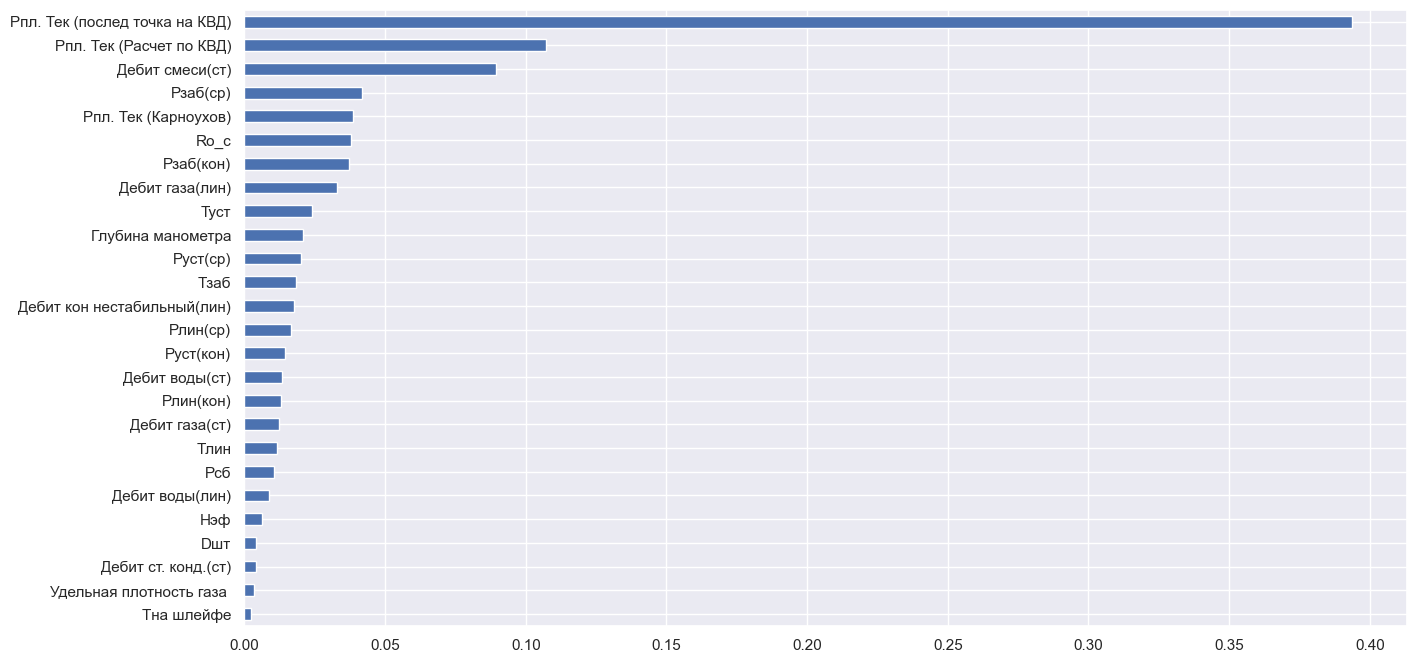

In [368]:
def feature_importance(X, Y):

    regr = RandomForestRegressor(max_depth=20, random_state=42)
    regr.fit(X, Y)
    feat_importances = pd.Series(regr.feature_importances_, index=X.columns).sort_values(ascending=True)
    feat_importances.plot(kind='barh')


df1 = df.fillna(-100)
X=df1.iloc[:, 0:26]
Y=df1.iloc[:, 26:27]

feature_importance(X, Y)


## Distribution graphs

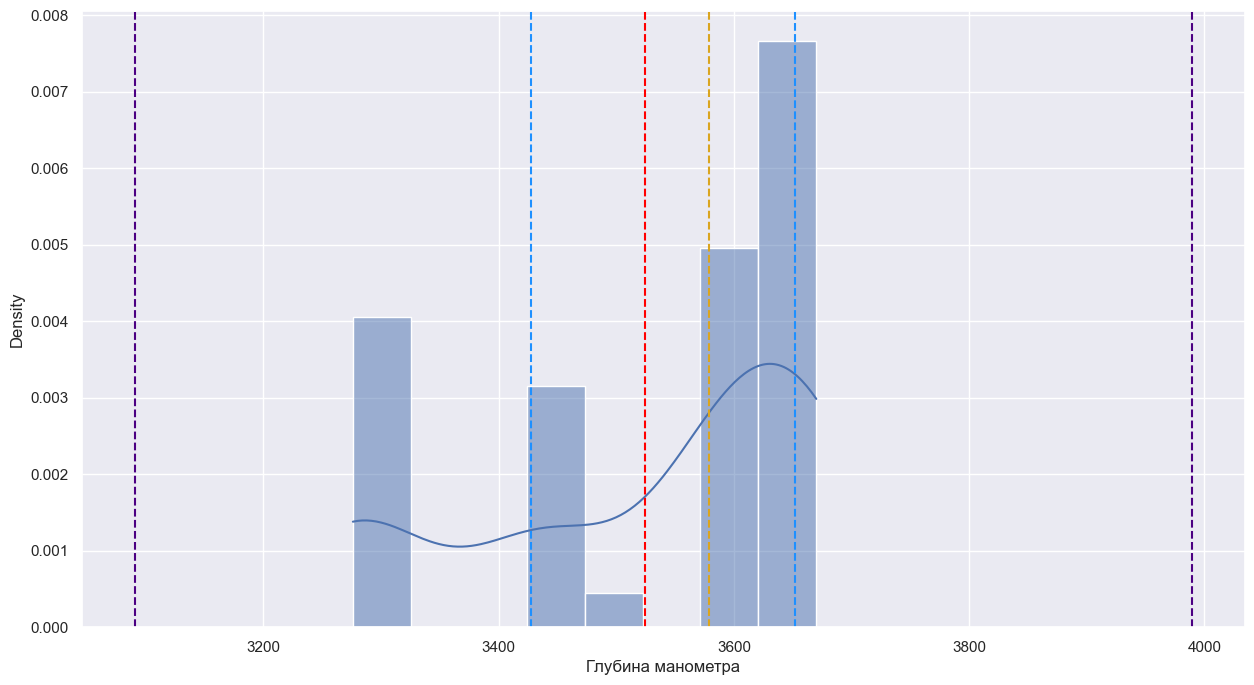

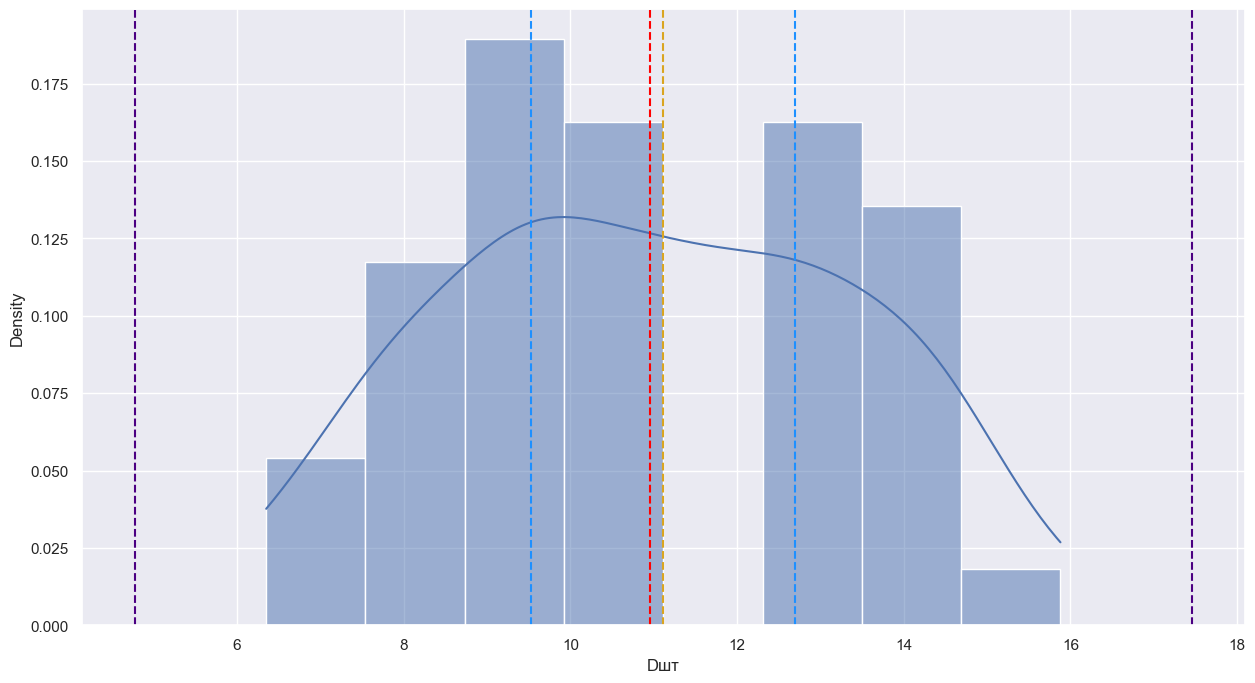

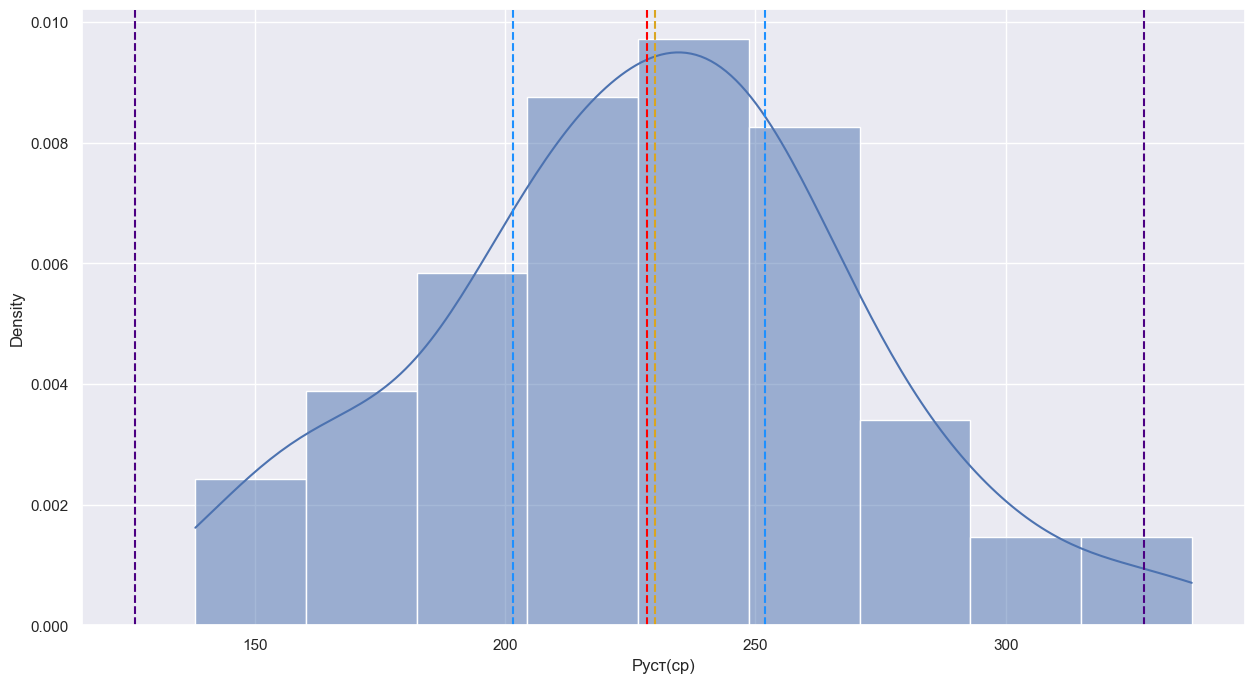

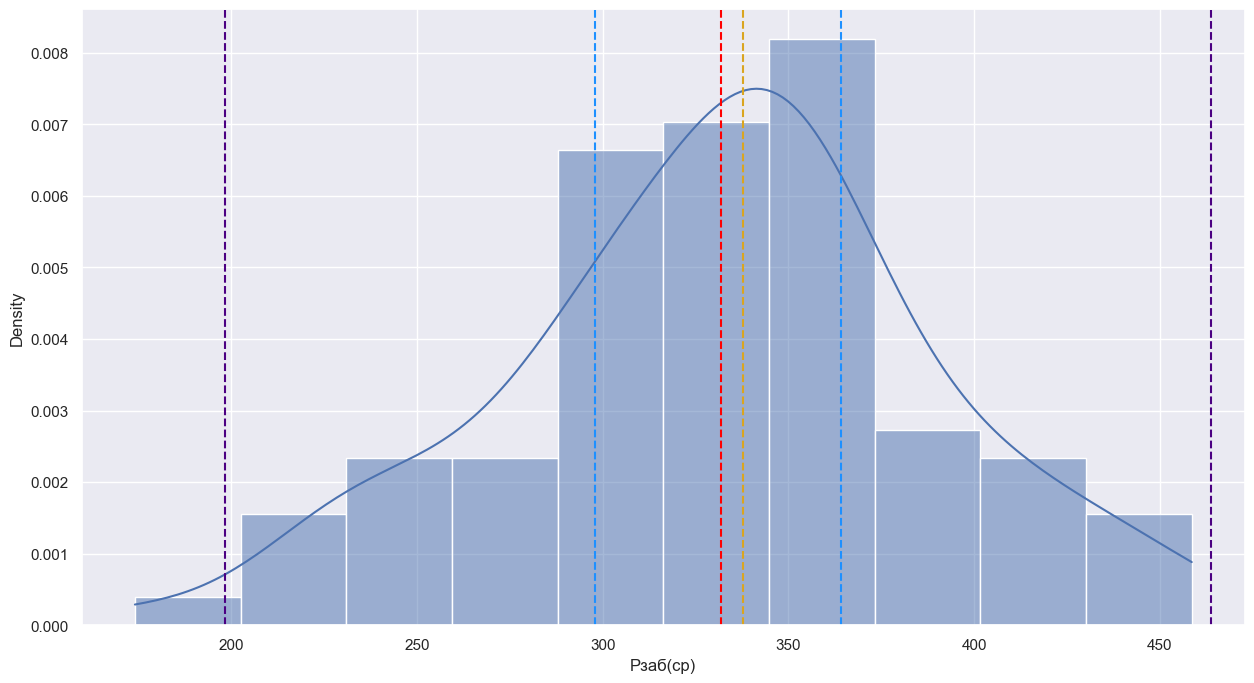

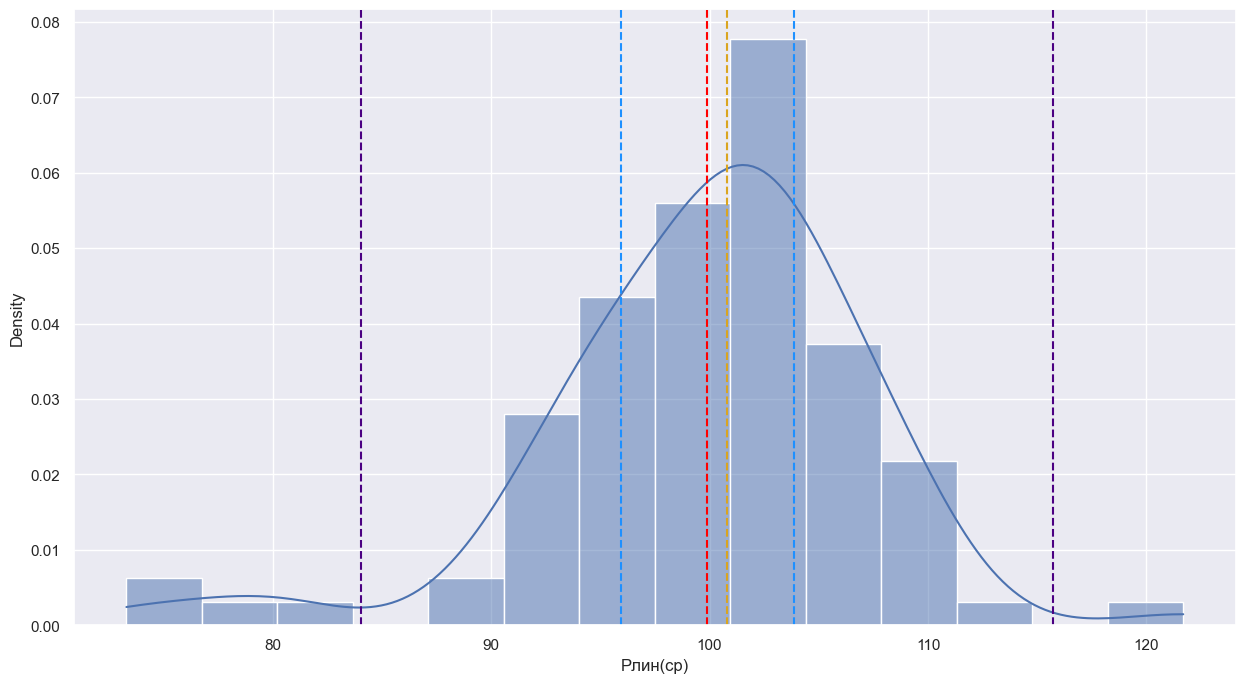

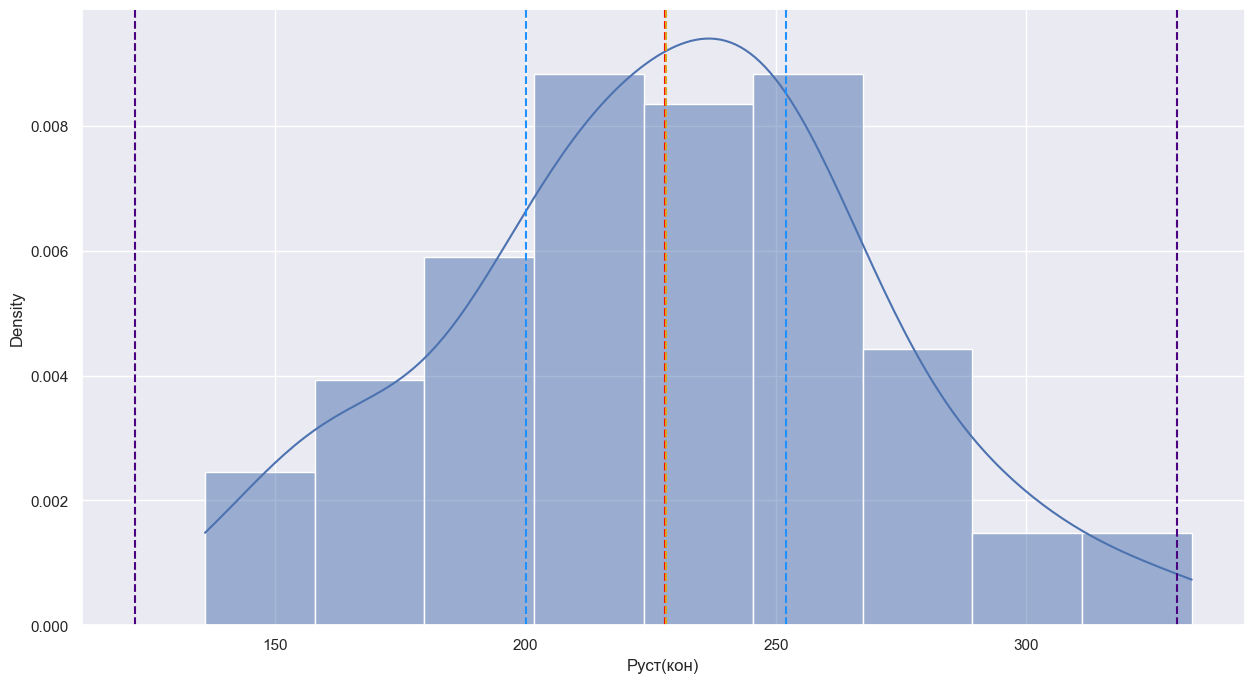

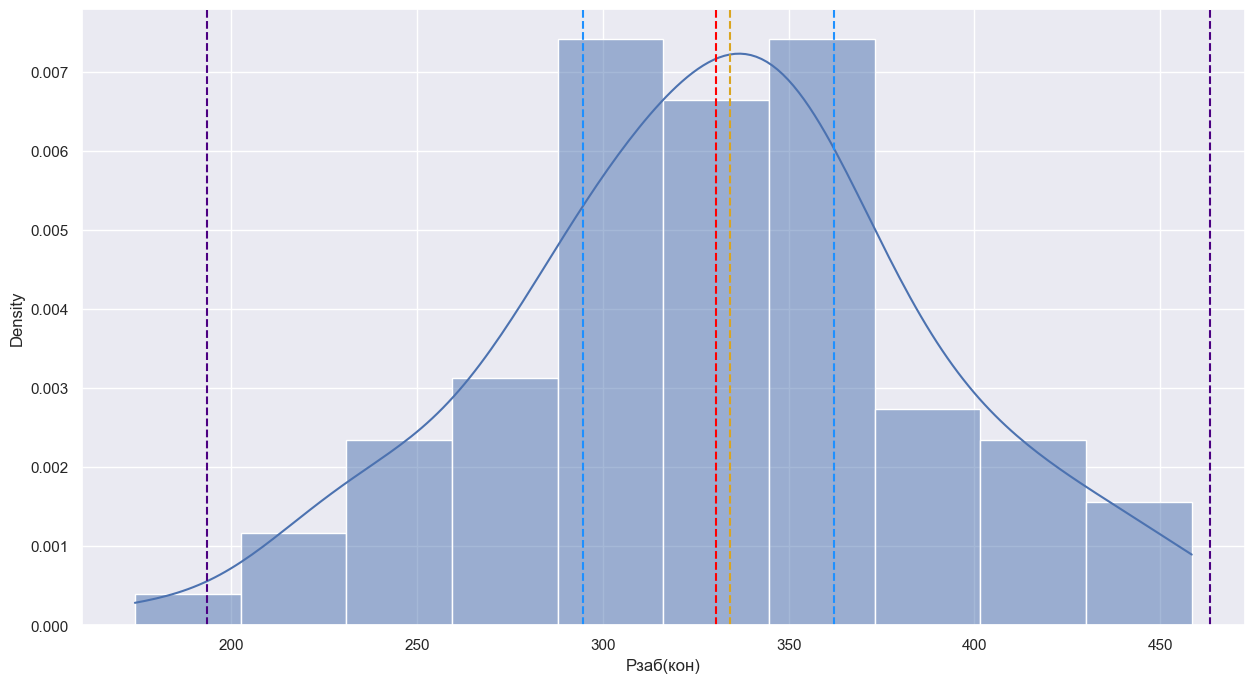

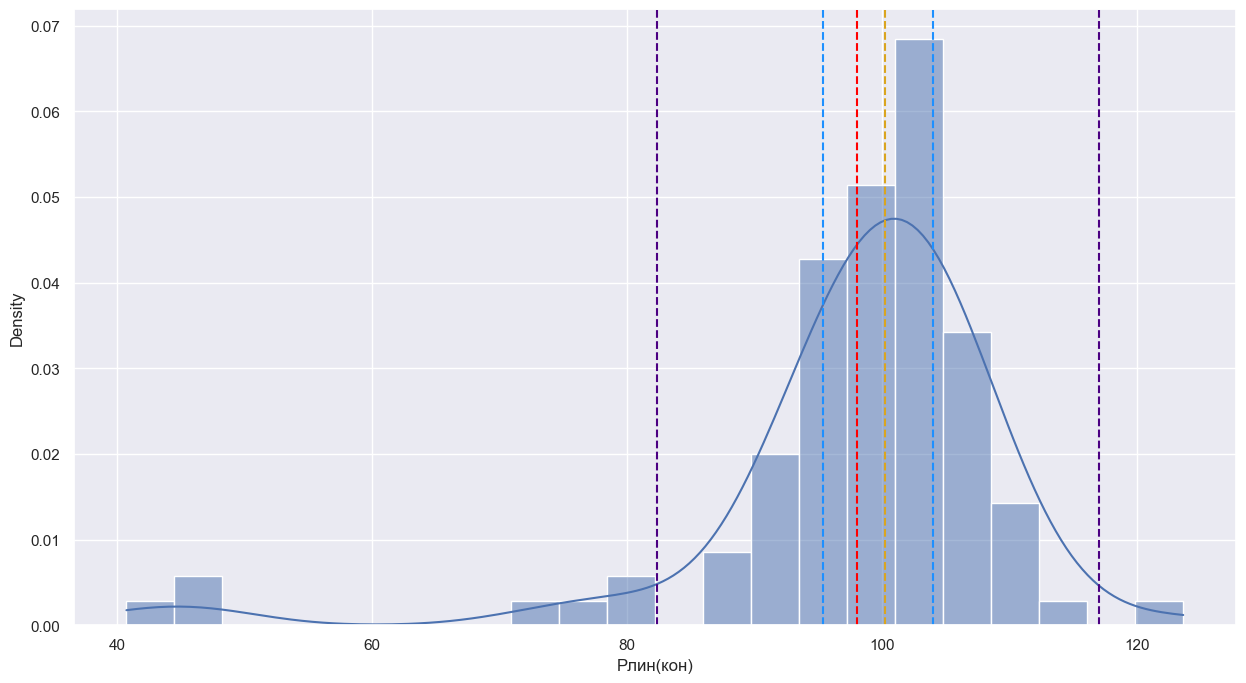

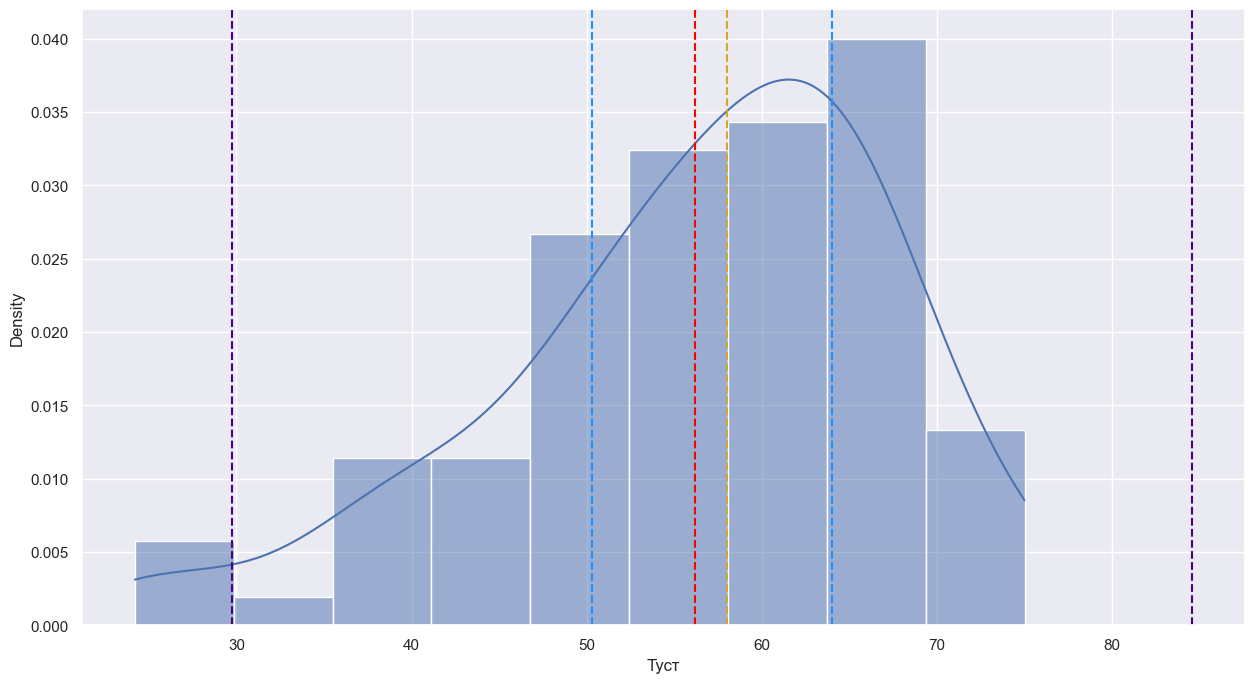

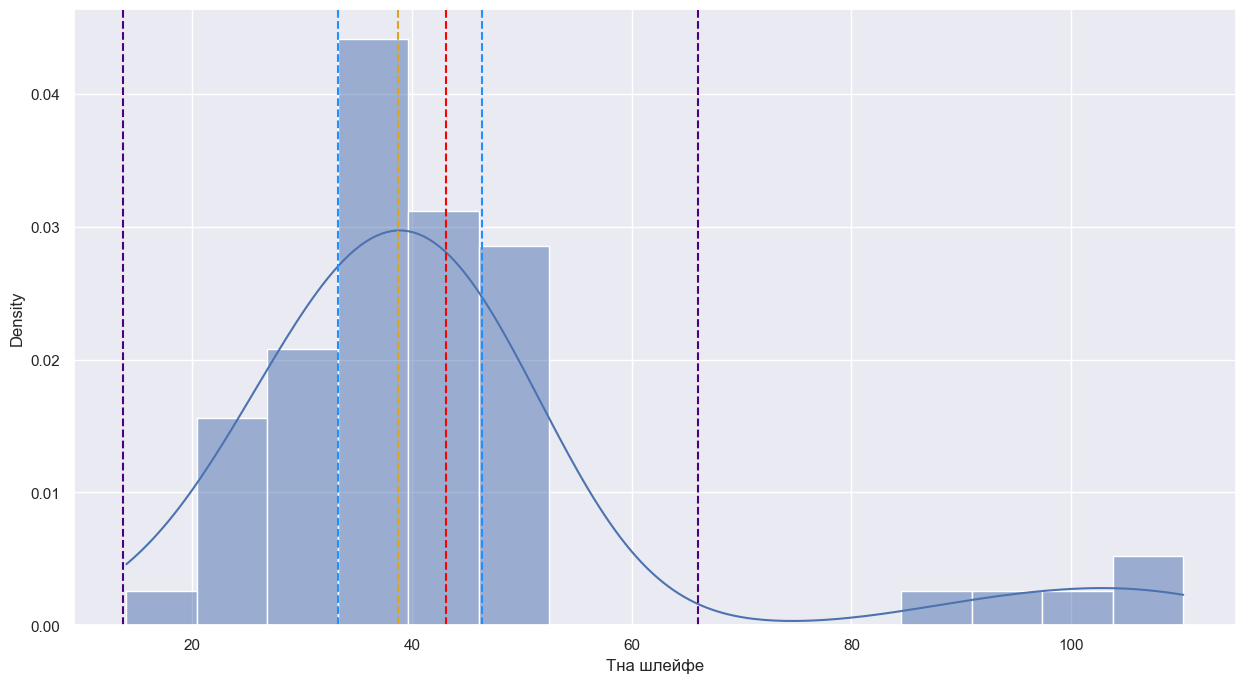

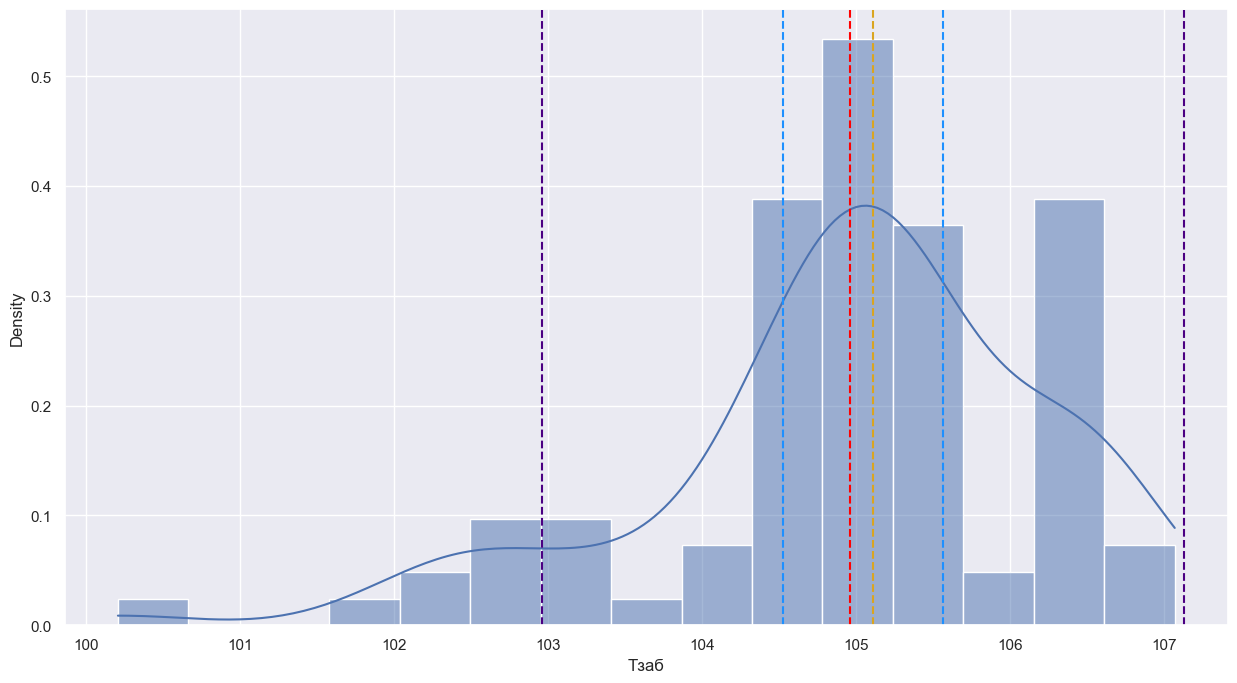

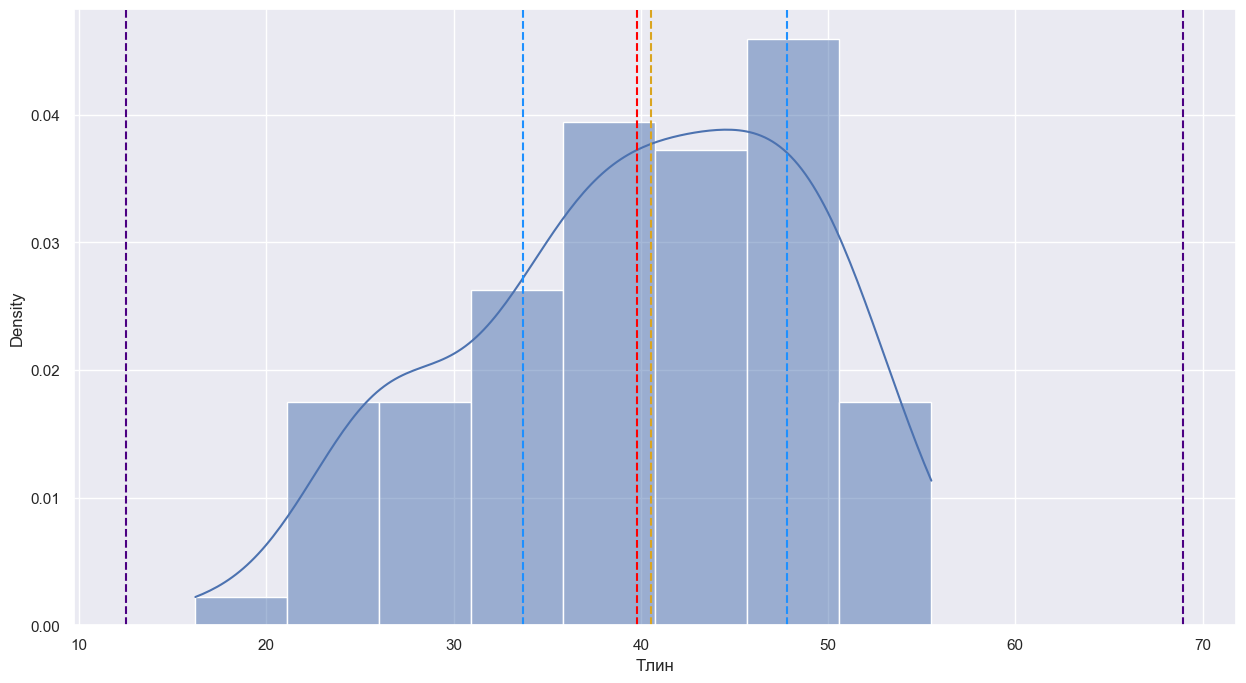

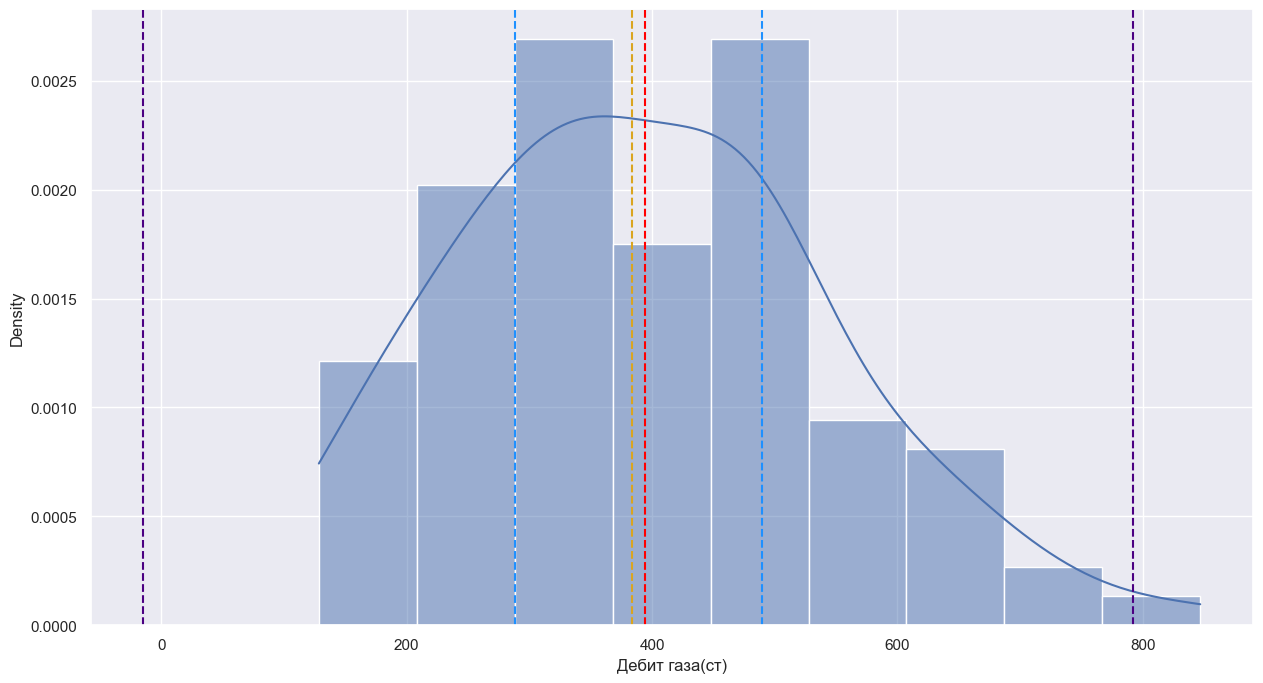

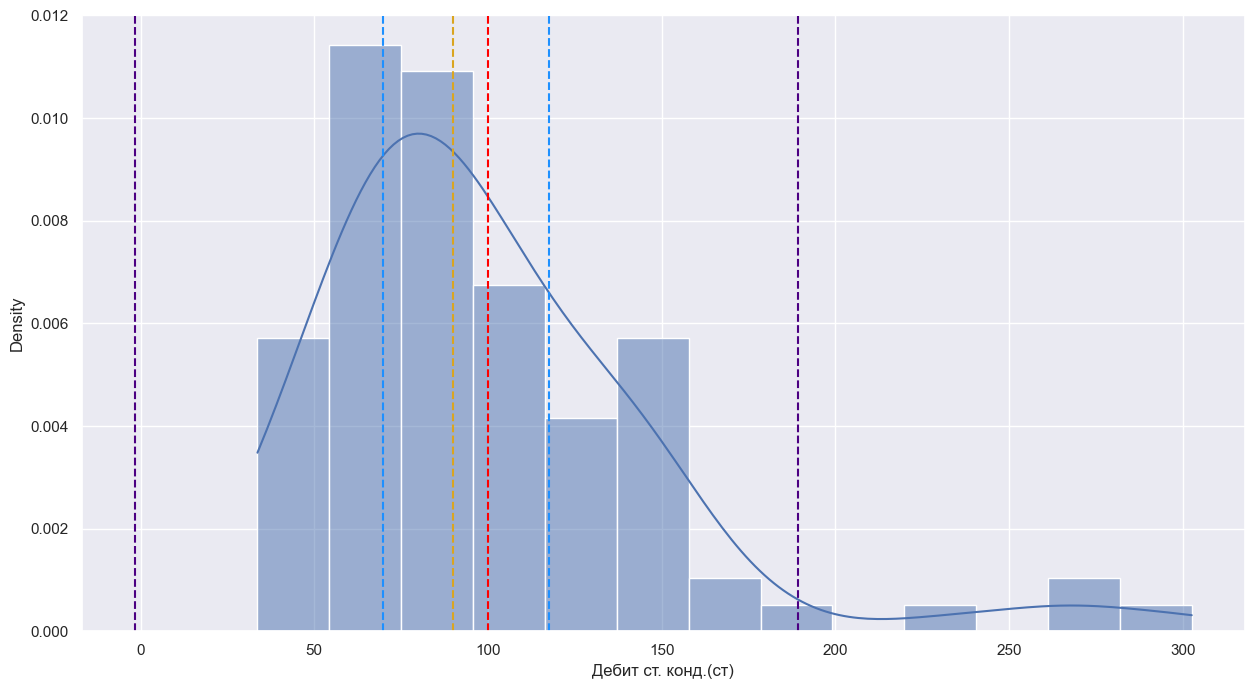

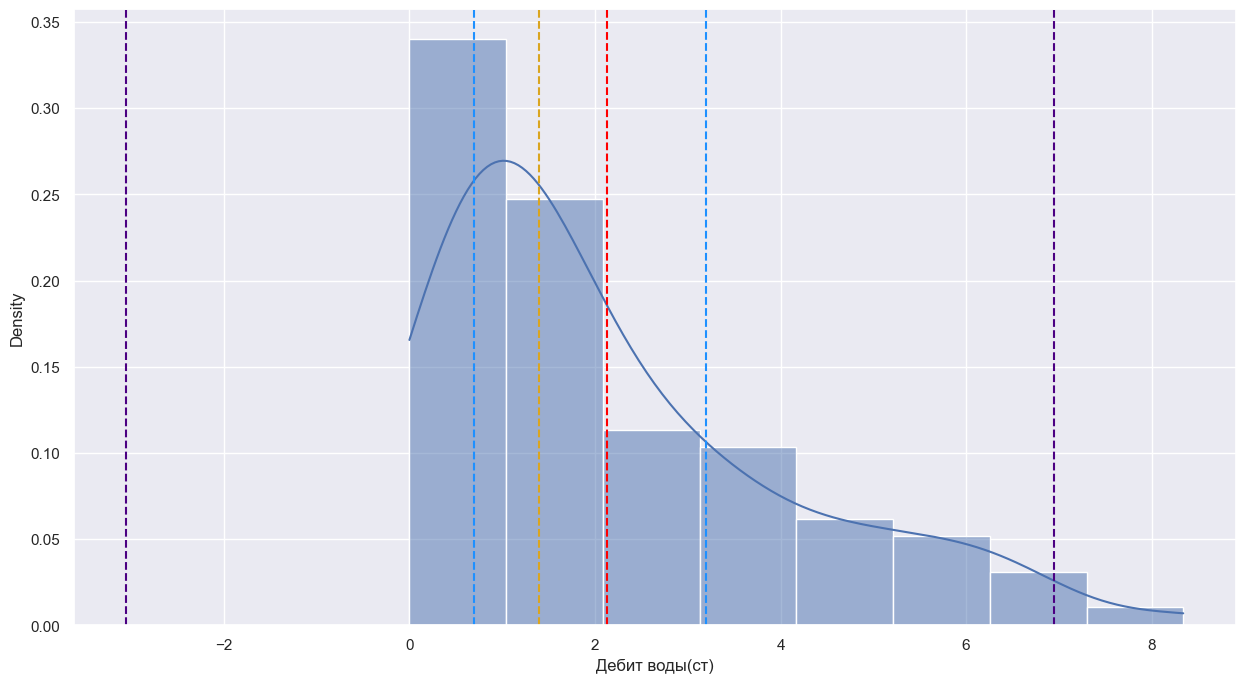

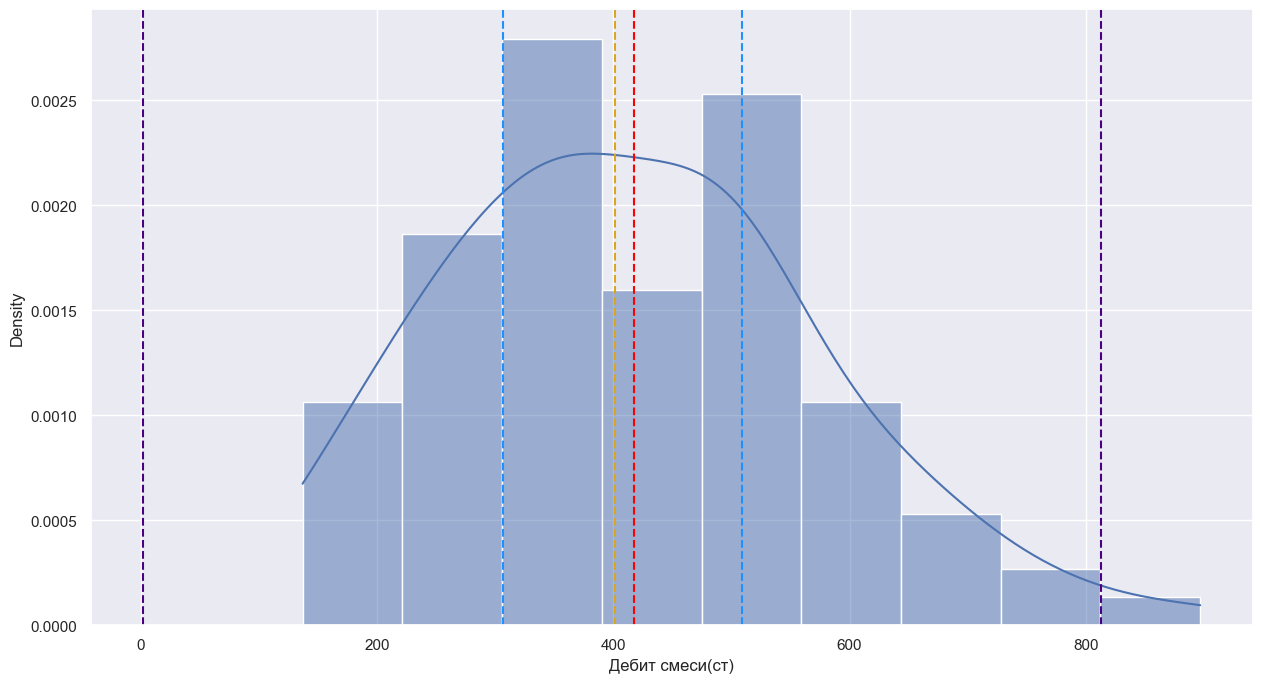

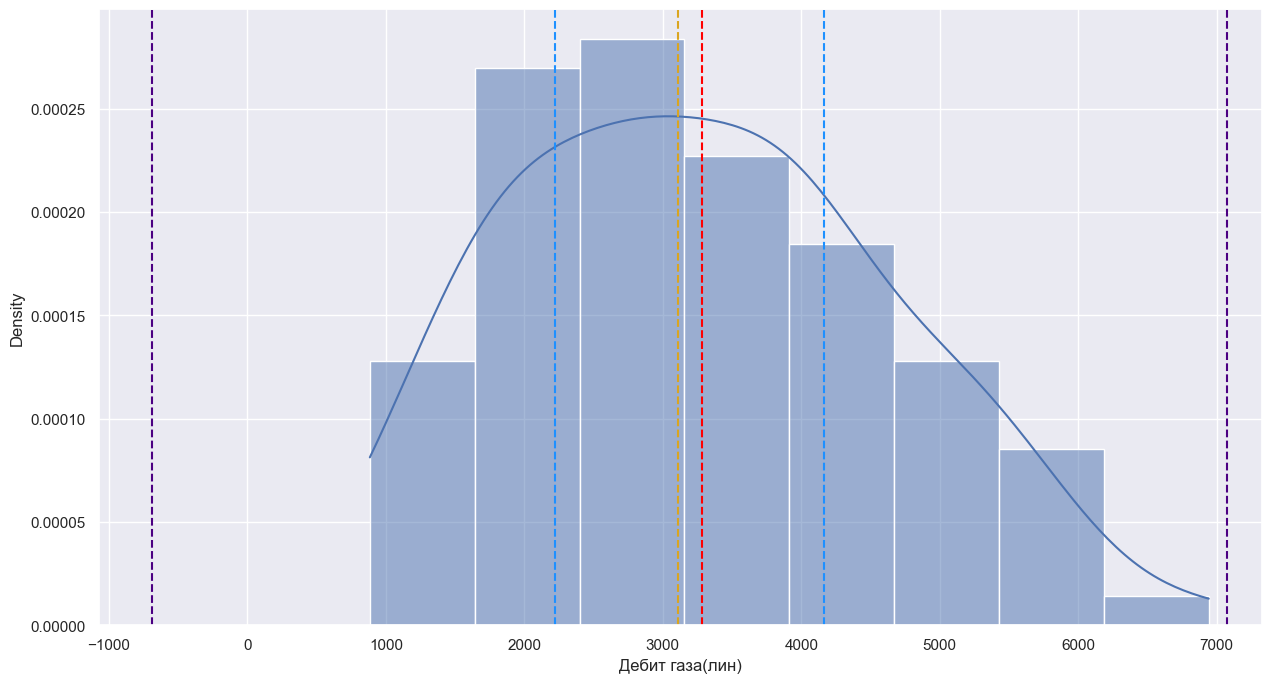

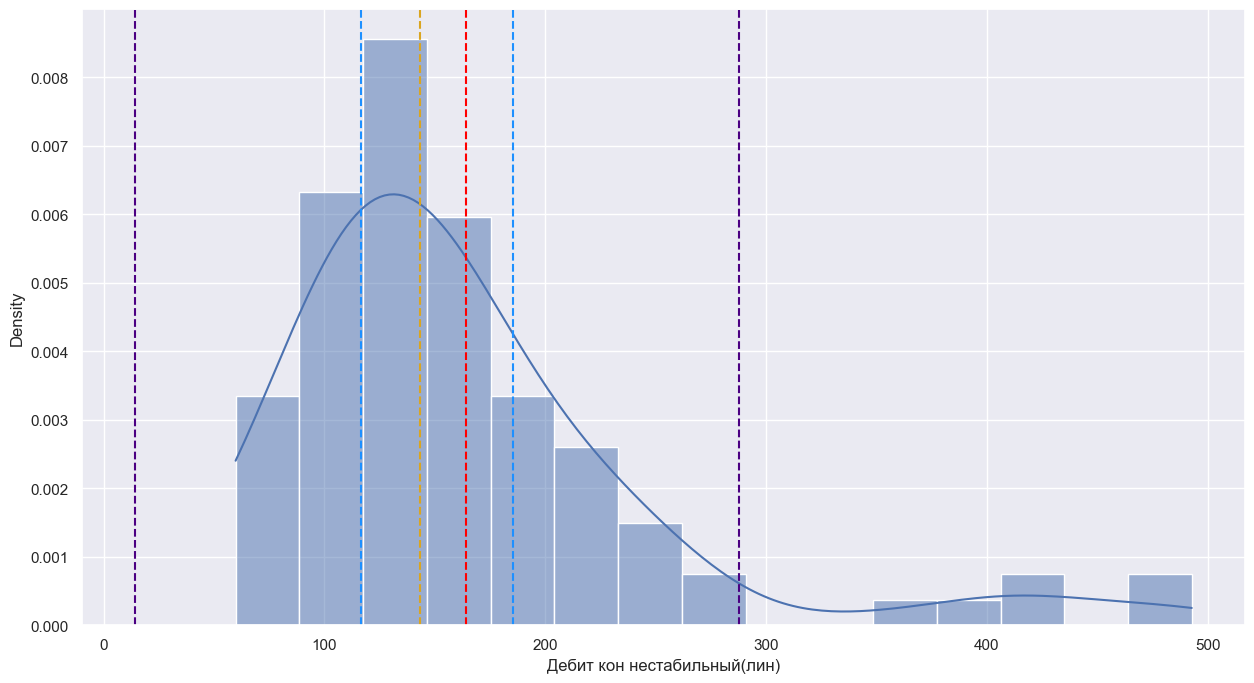

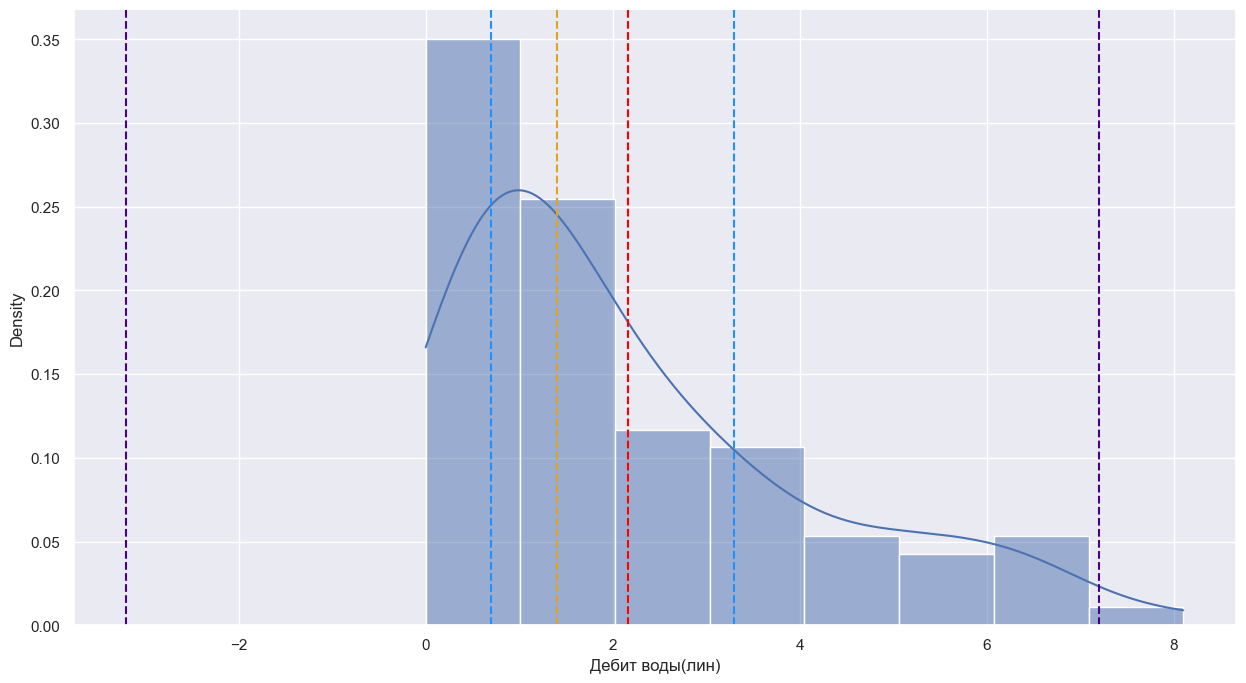

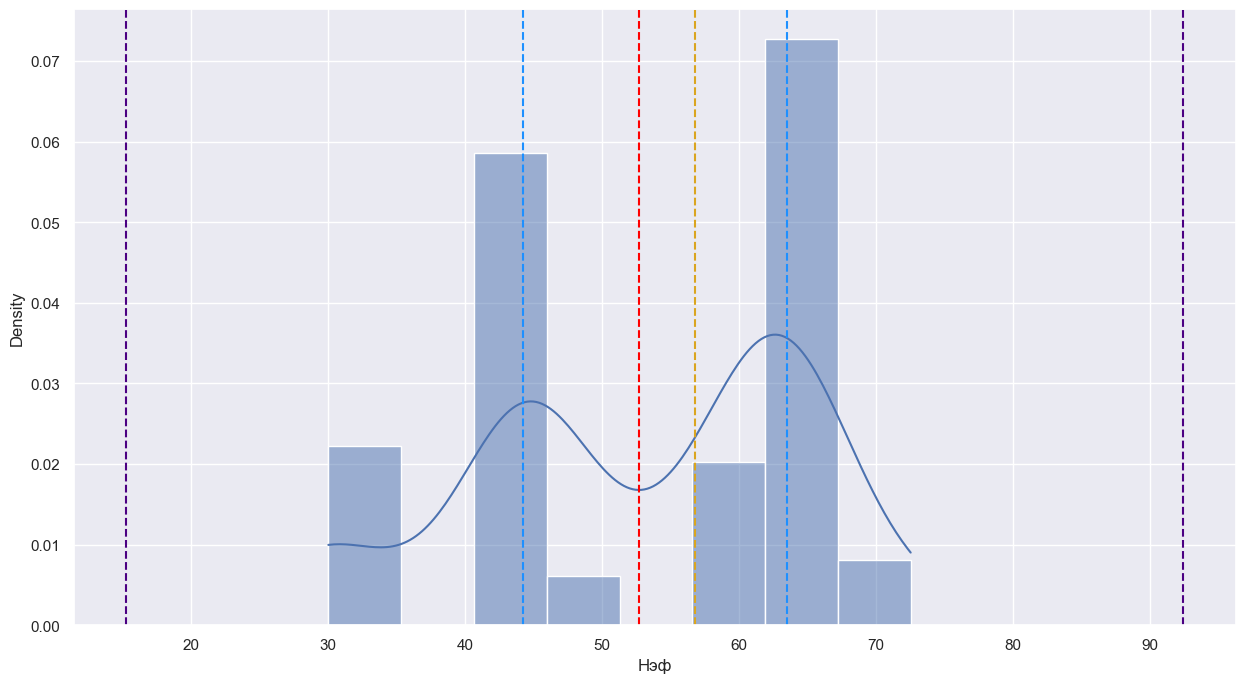

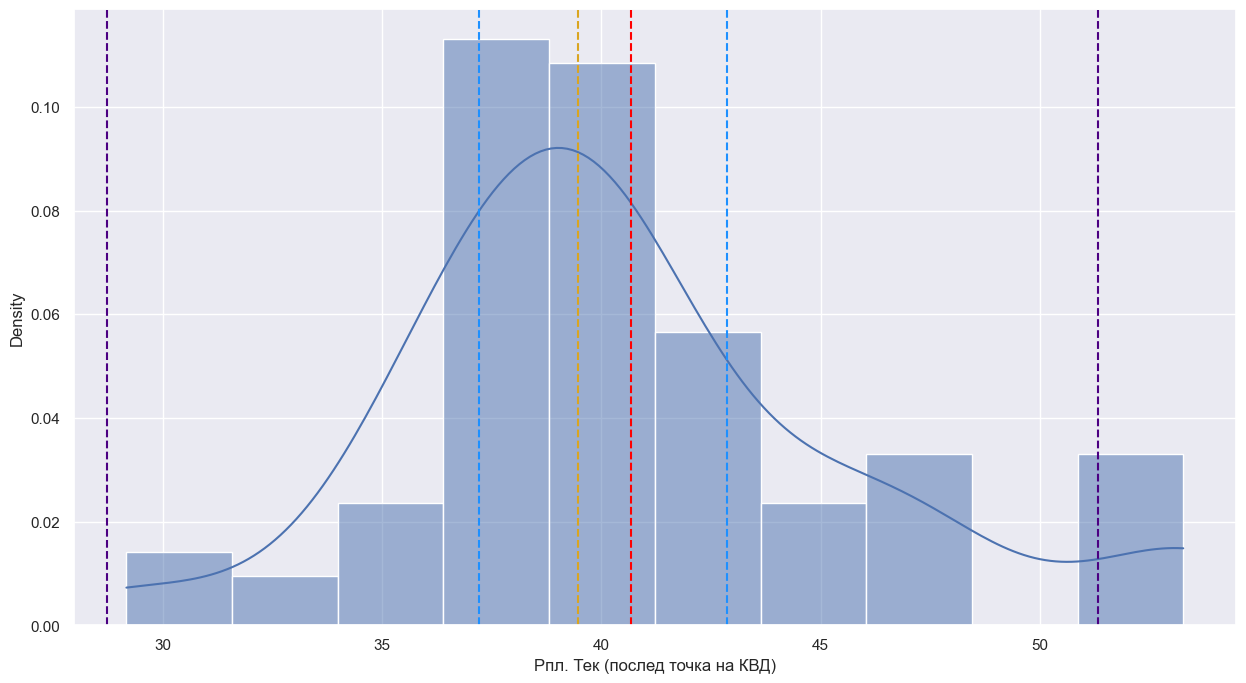

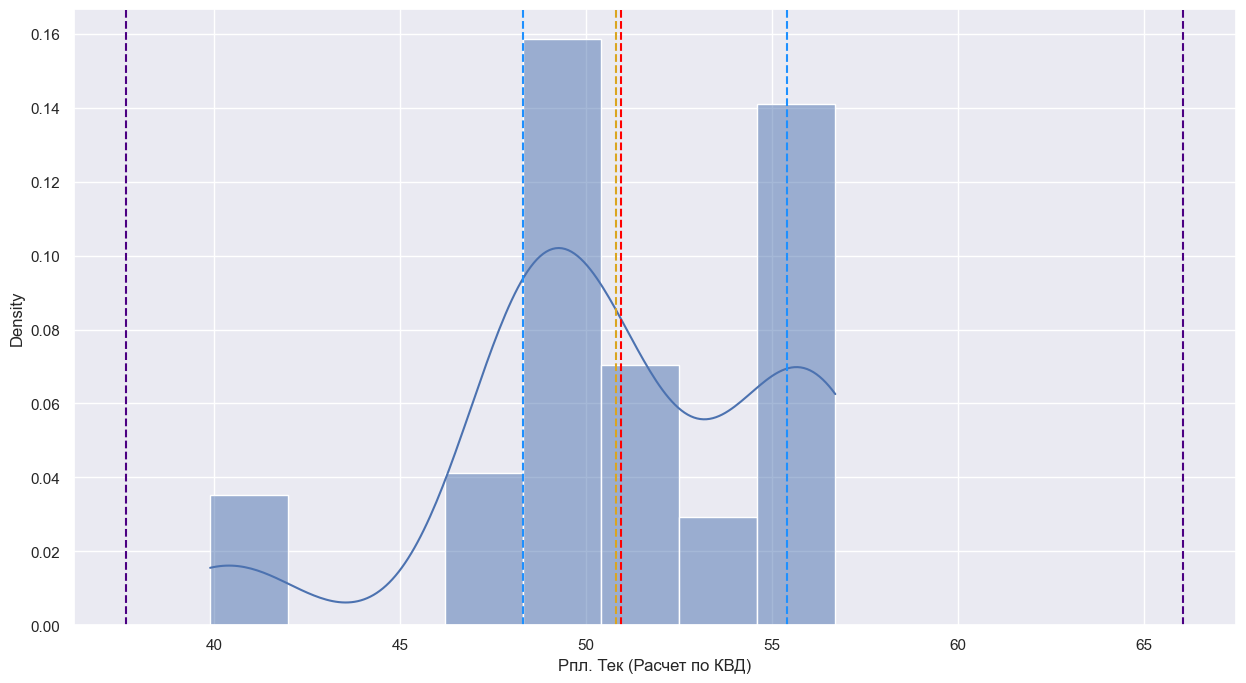

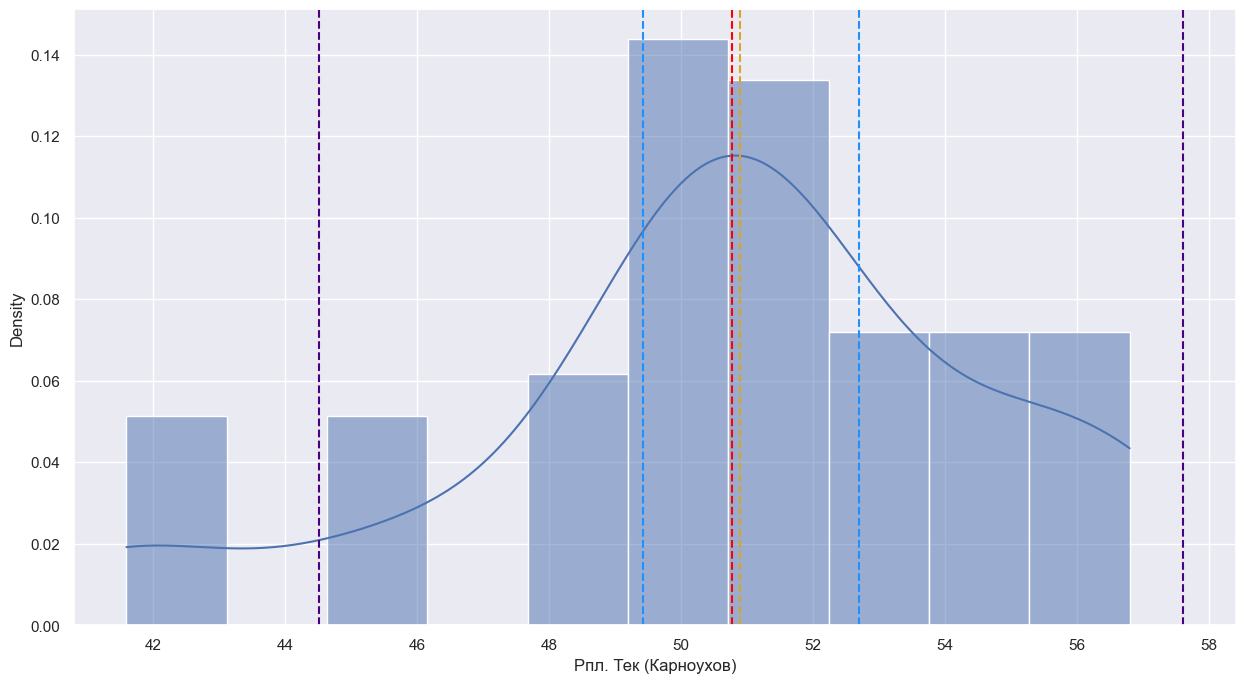

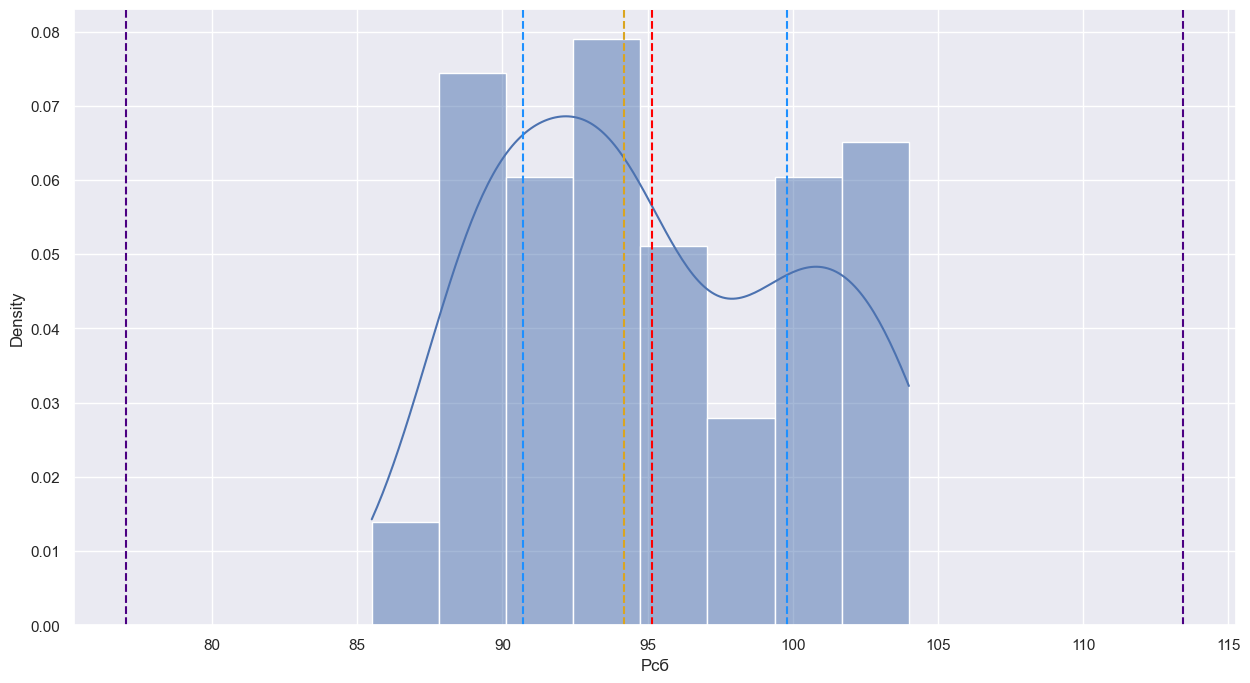

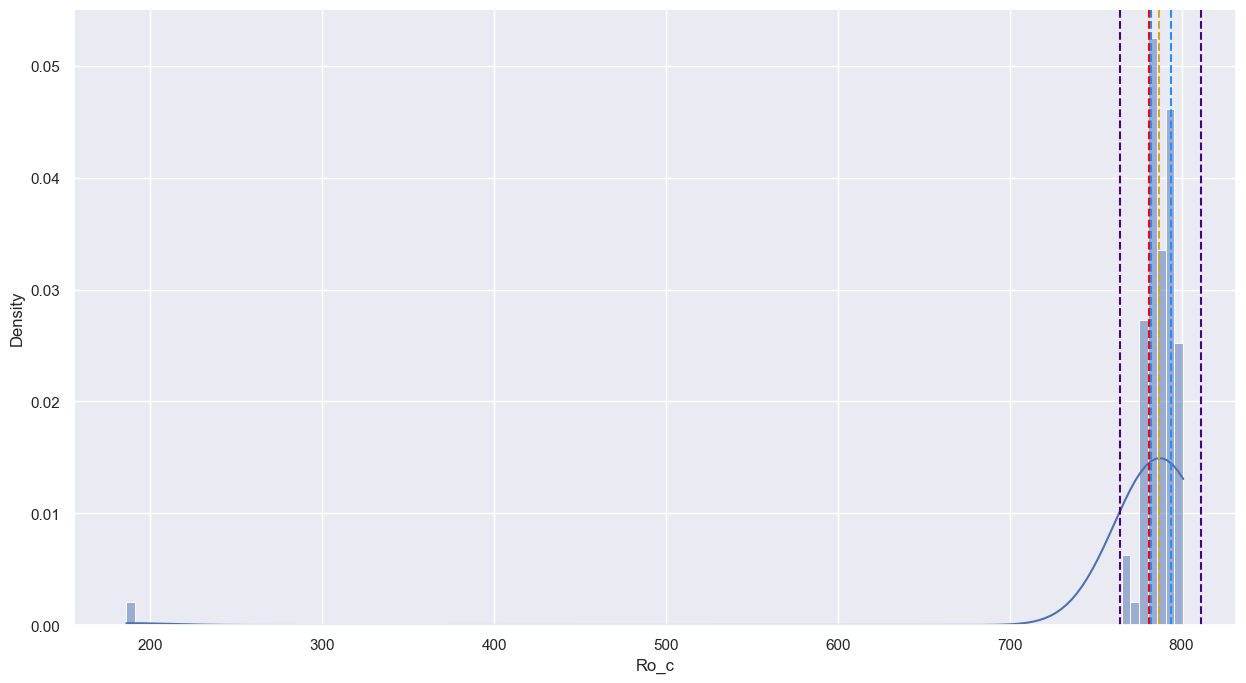

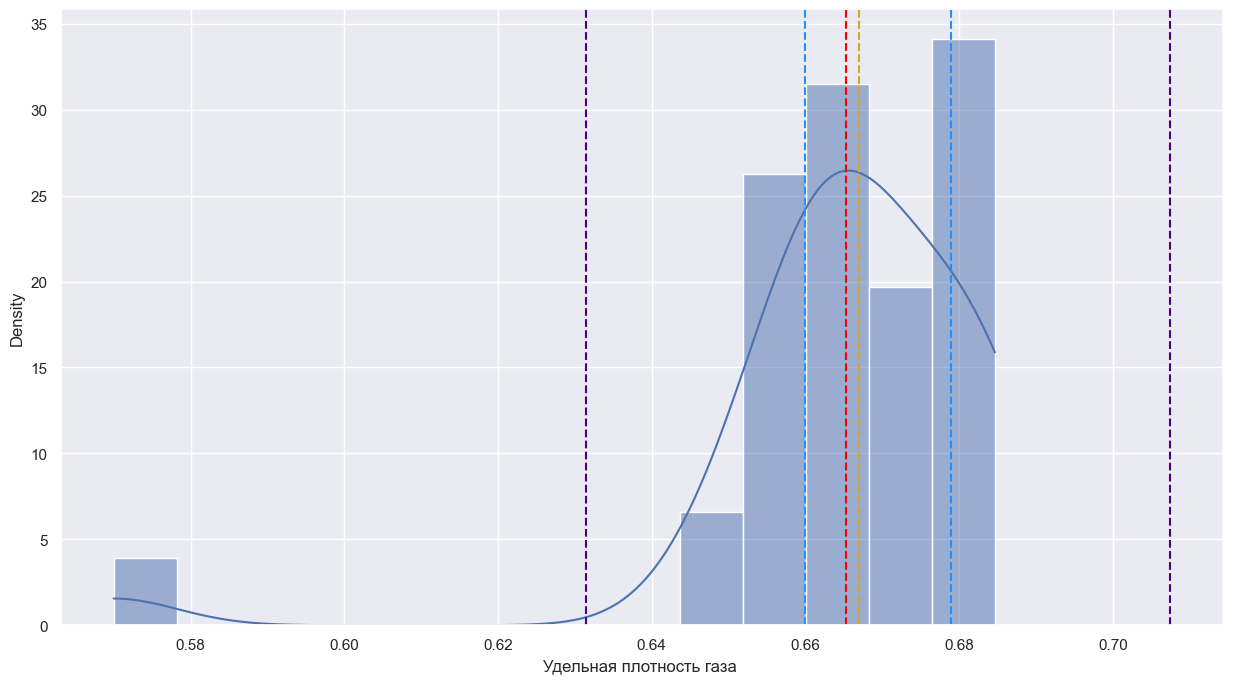

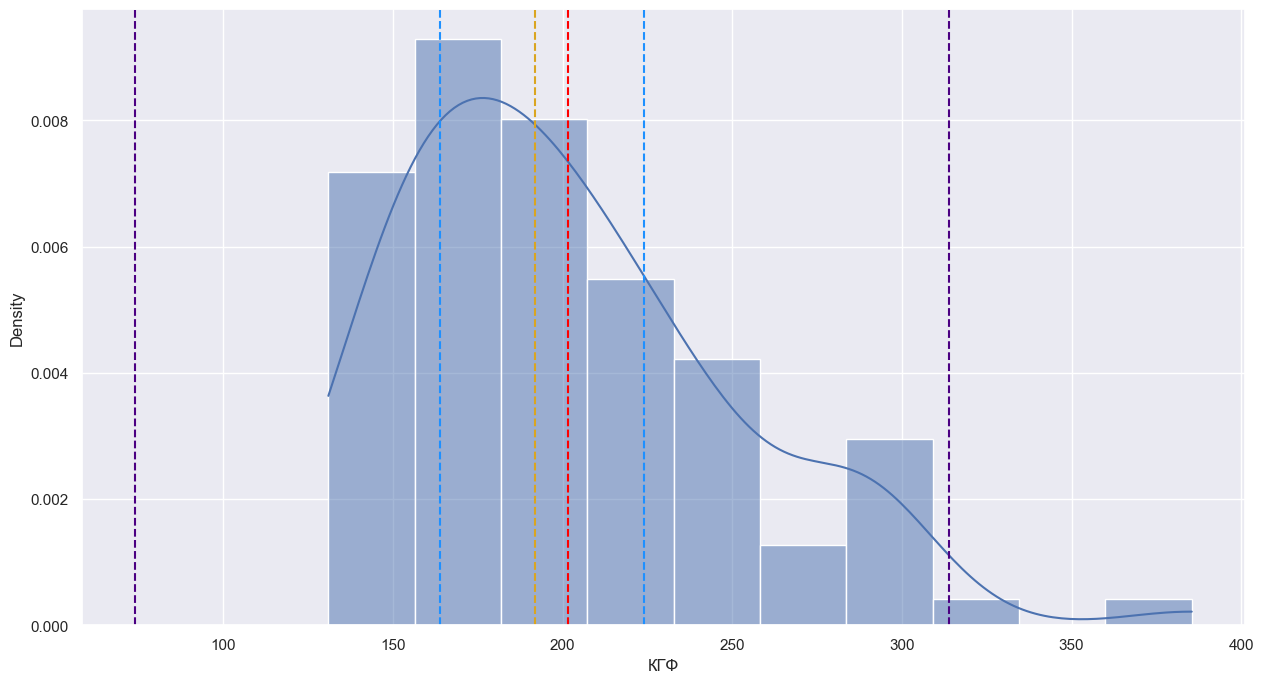

In [369]:
#creating histograms for each feature 
for i in df.columns:
    plt.figure(i)
    sns.histplot(df[i],kde=True,stat="density")
    plt.axvline(f.iloc[3][i]-1.5*f.iloc[10][i], color="indigo", ls='--') #q1-1.5*iqr
    plt.axvline(f.iloc[3][i], color="dodgerblue", ls='--') #first quarile
    plt.axvline(f.iloc[4][i], color="red", ls='--') #mean
    plt.axvline(f.iloc[5][i], color="goldenrod", ls='--') #meadian
    plt.axvline(f.iloc[6][i], color="dodgerblue", ls='--') #third quatile
    plt.axvline(f.iloc[6][i]+1.5*f.iloc[10][i], color="indigo", ls='--') #q3+1.5*iqr
    plt.show()

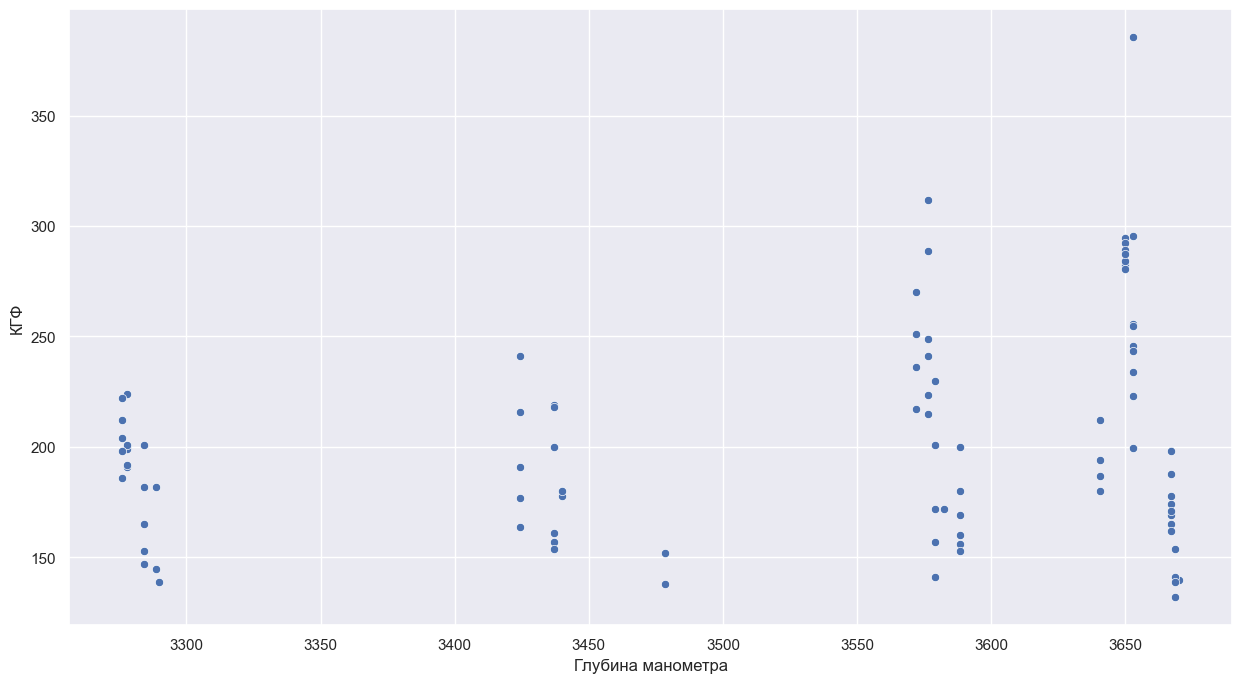

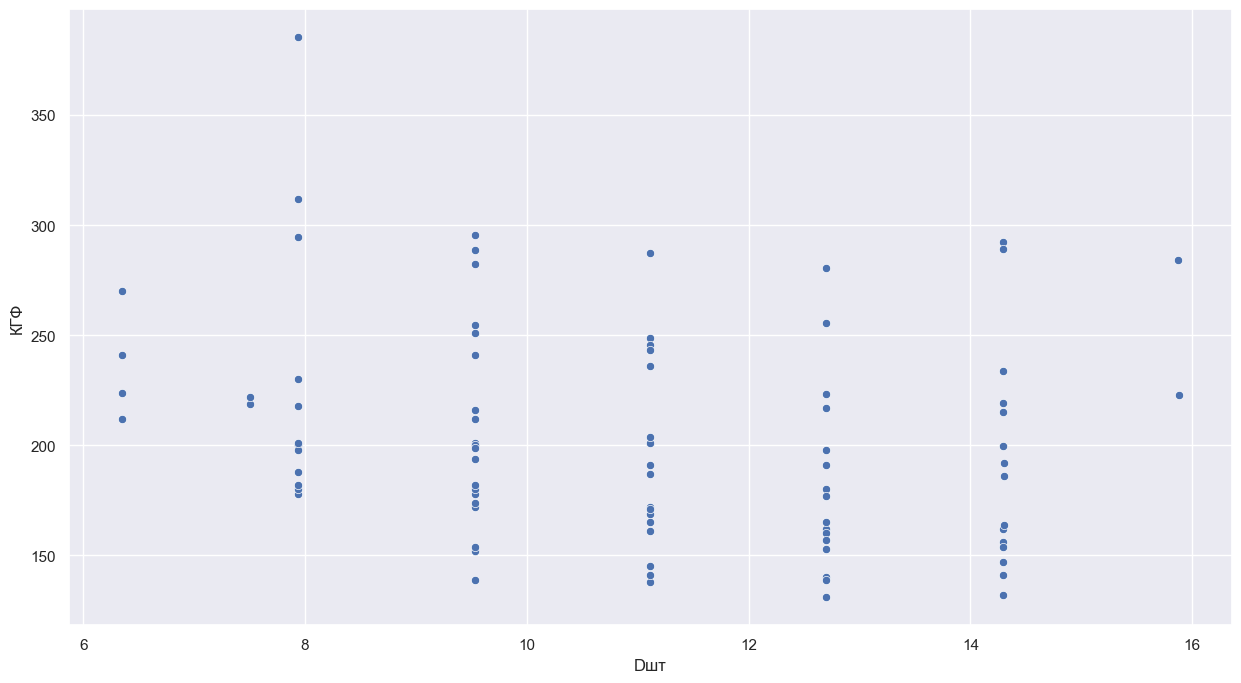

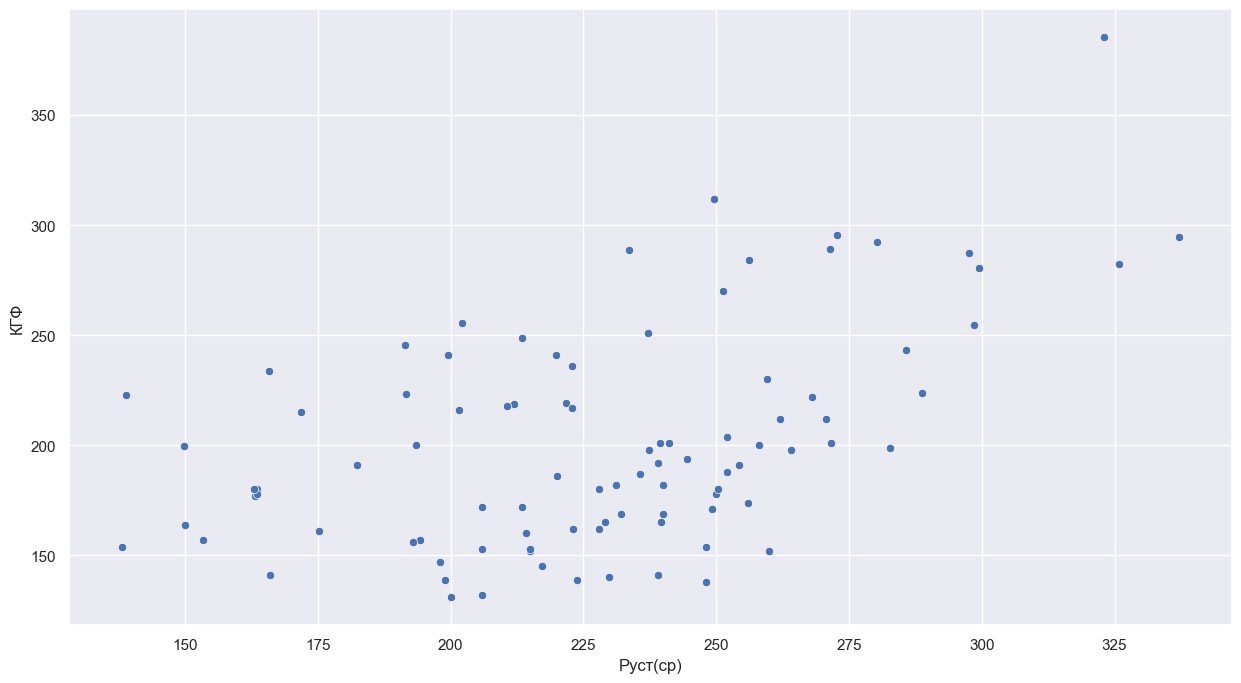

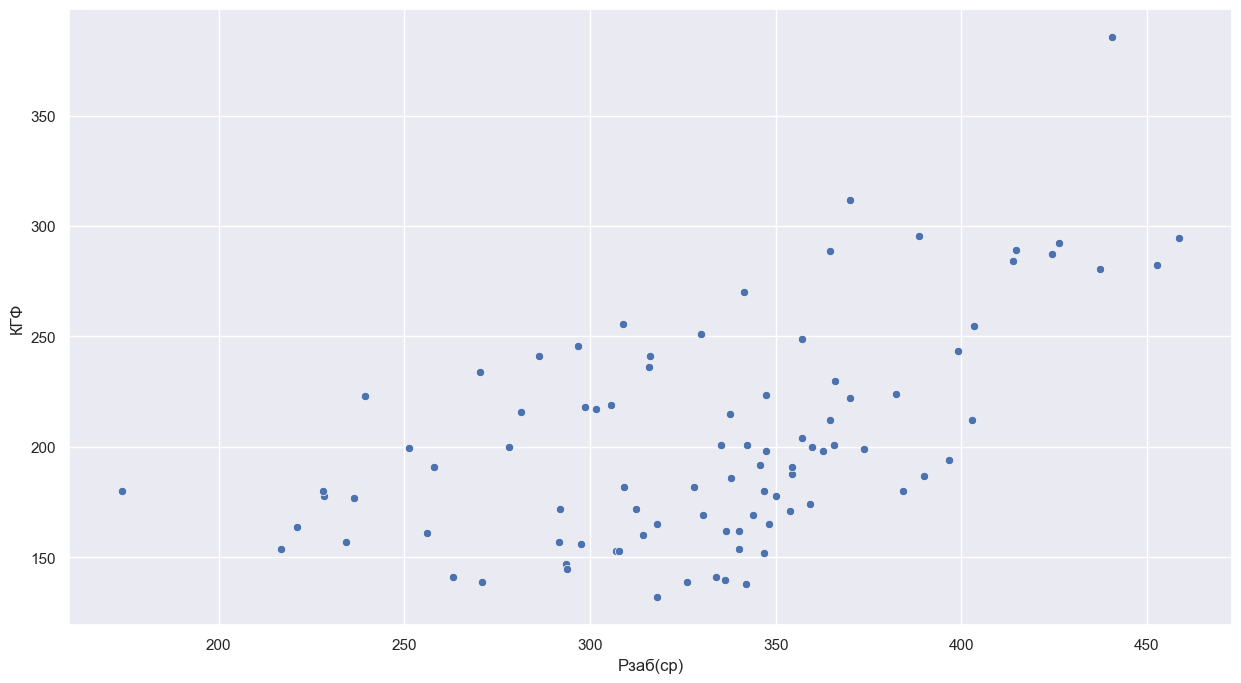

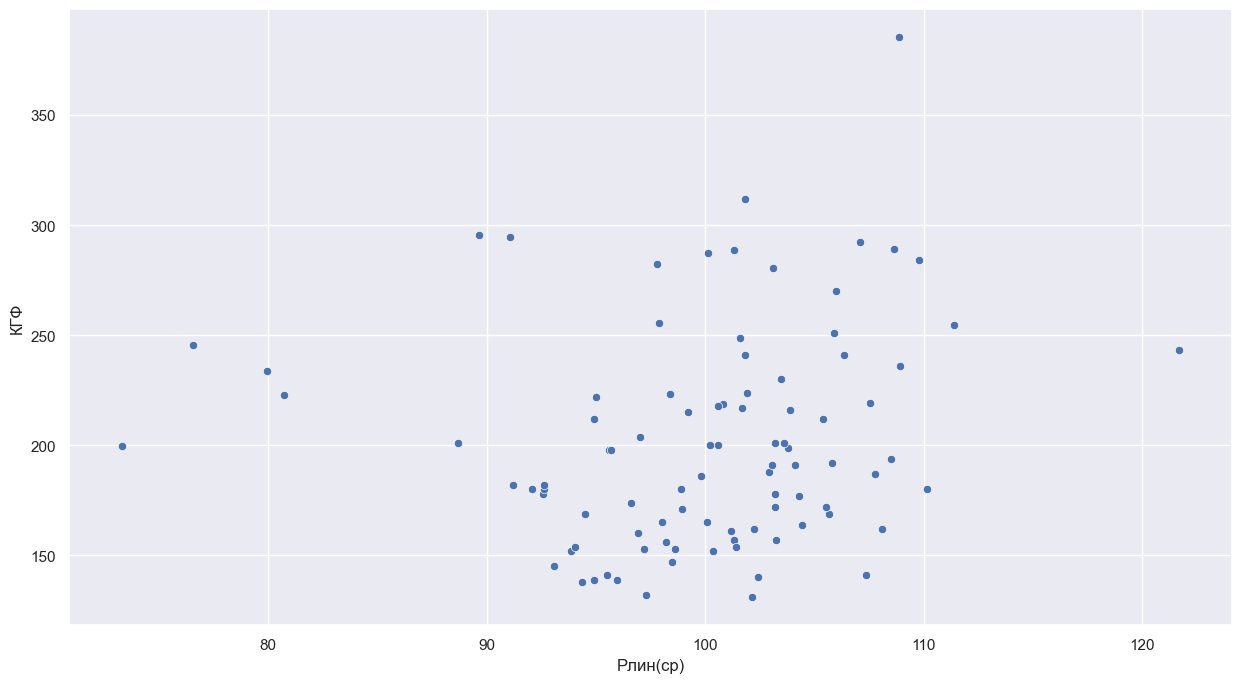

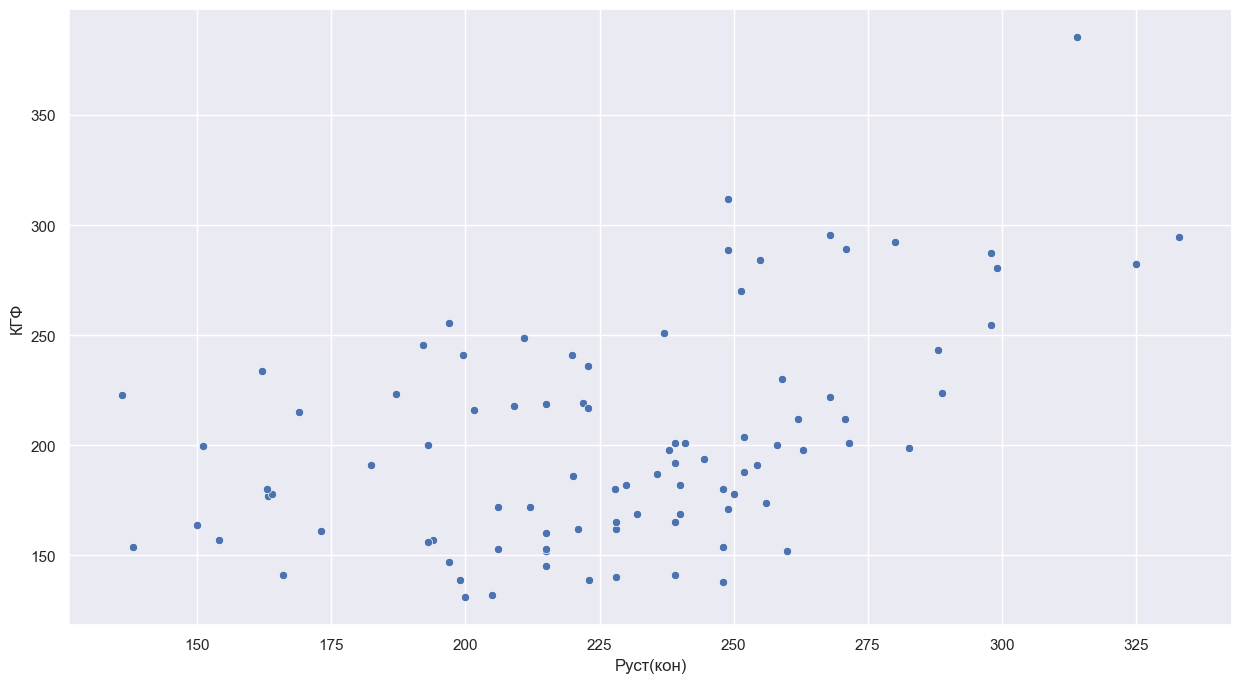

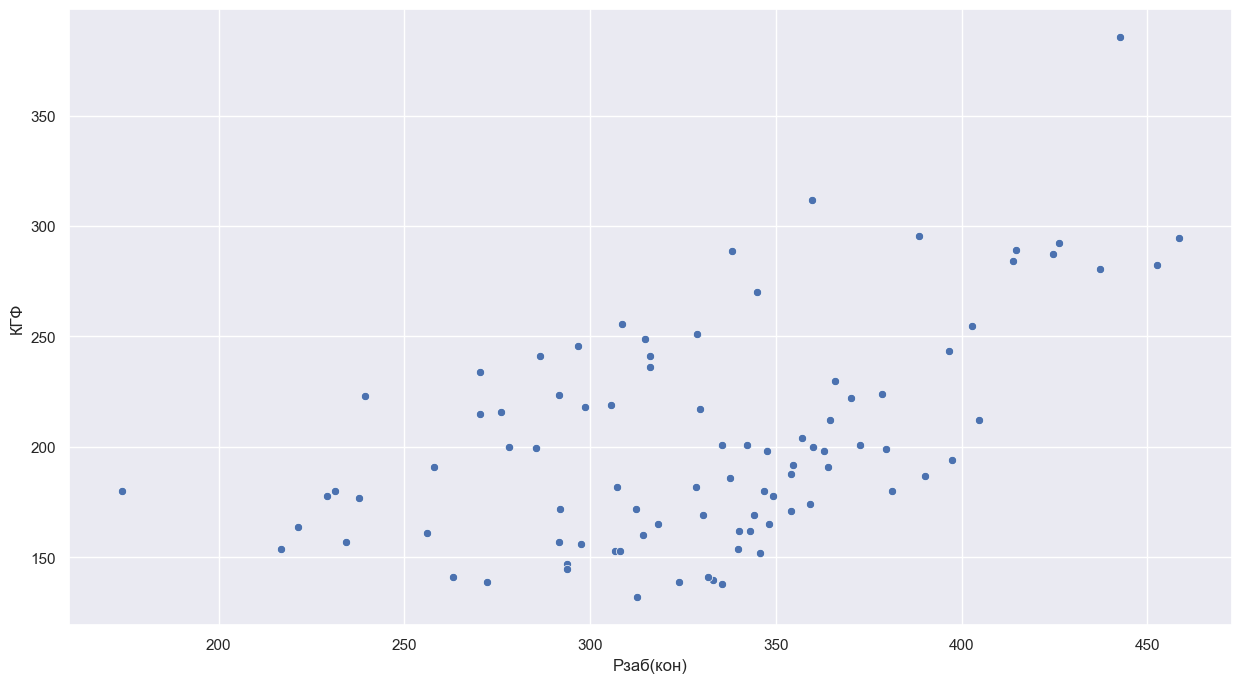

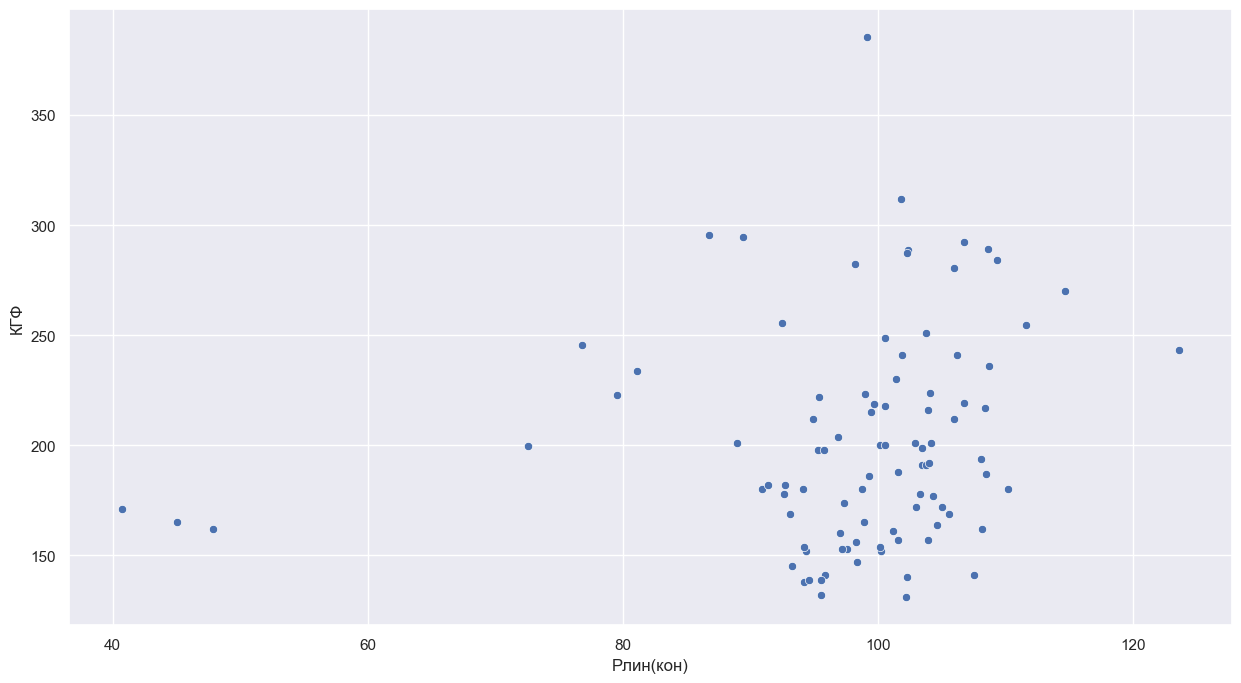

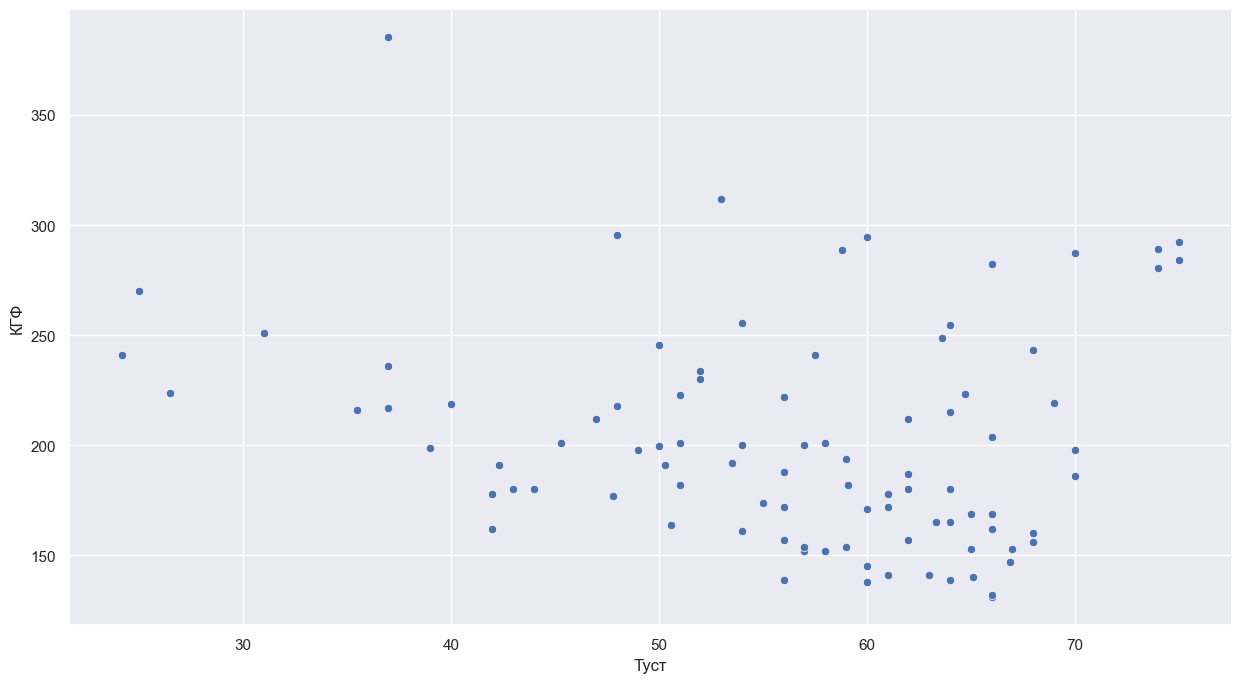

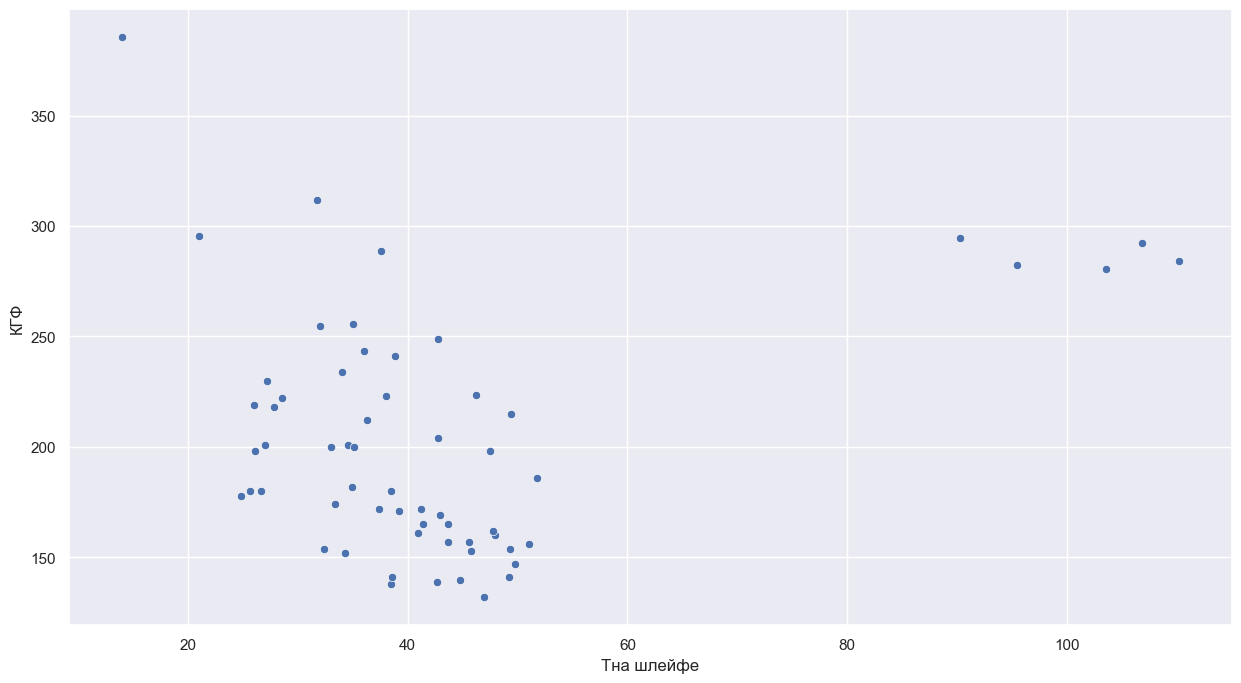

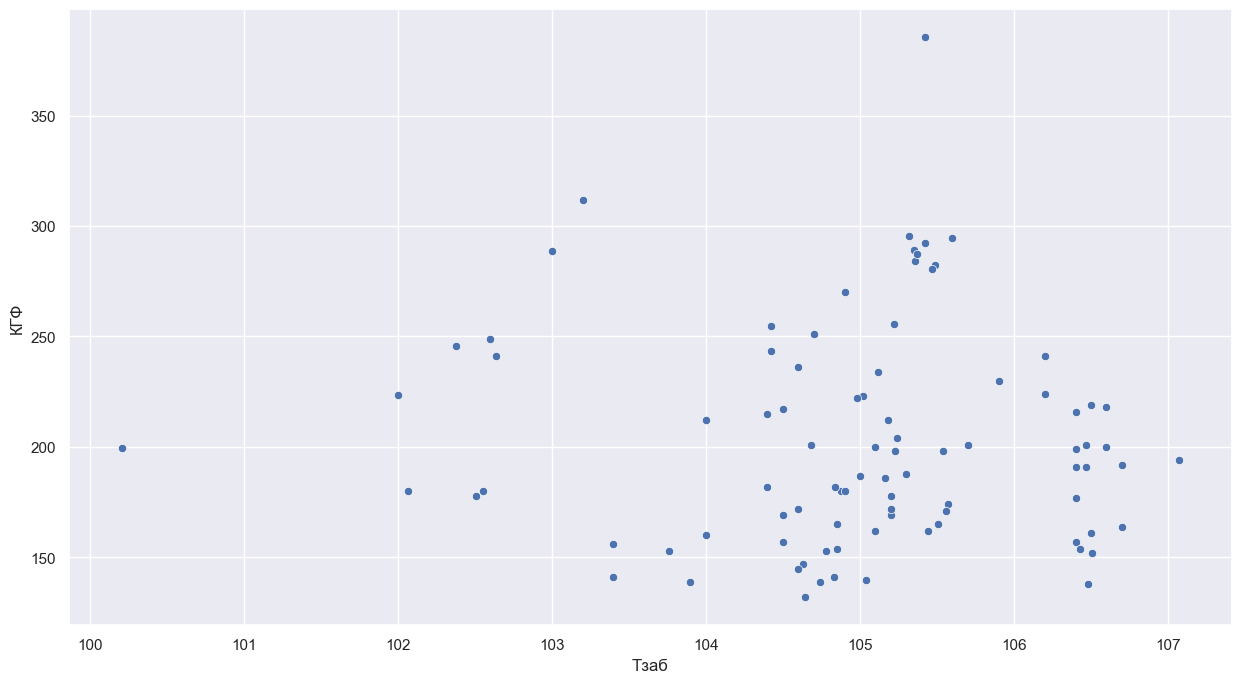

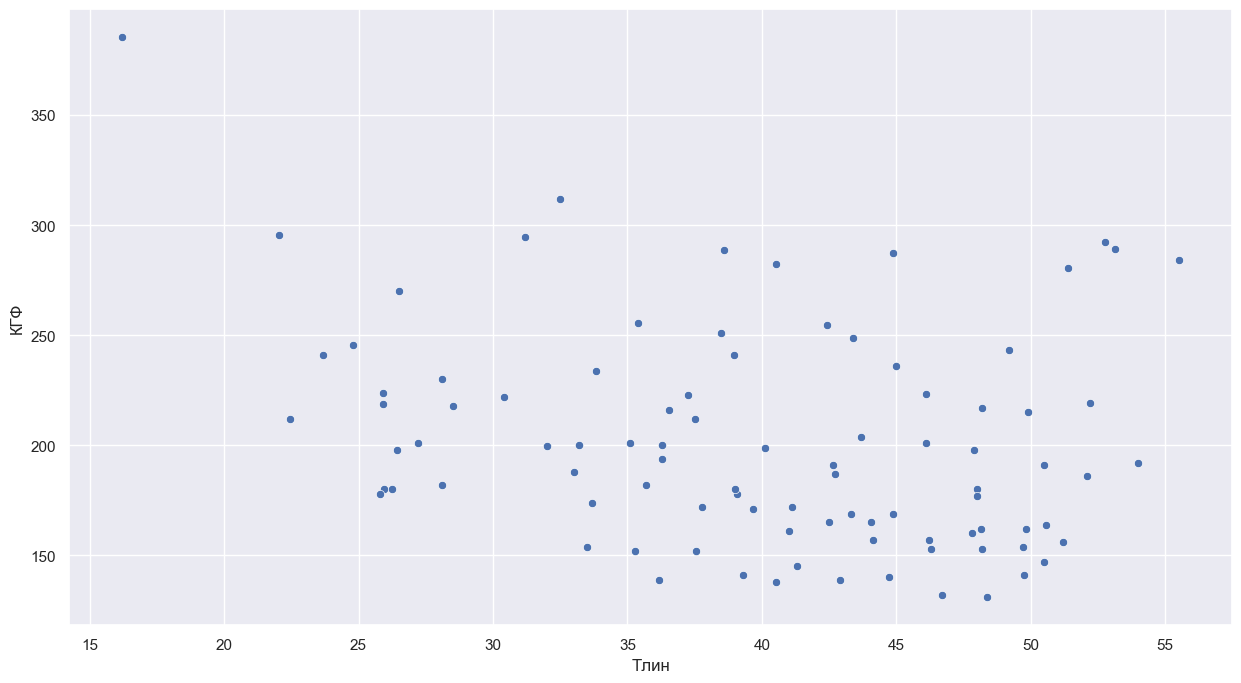

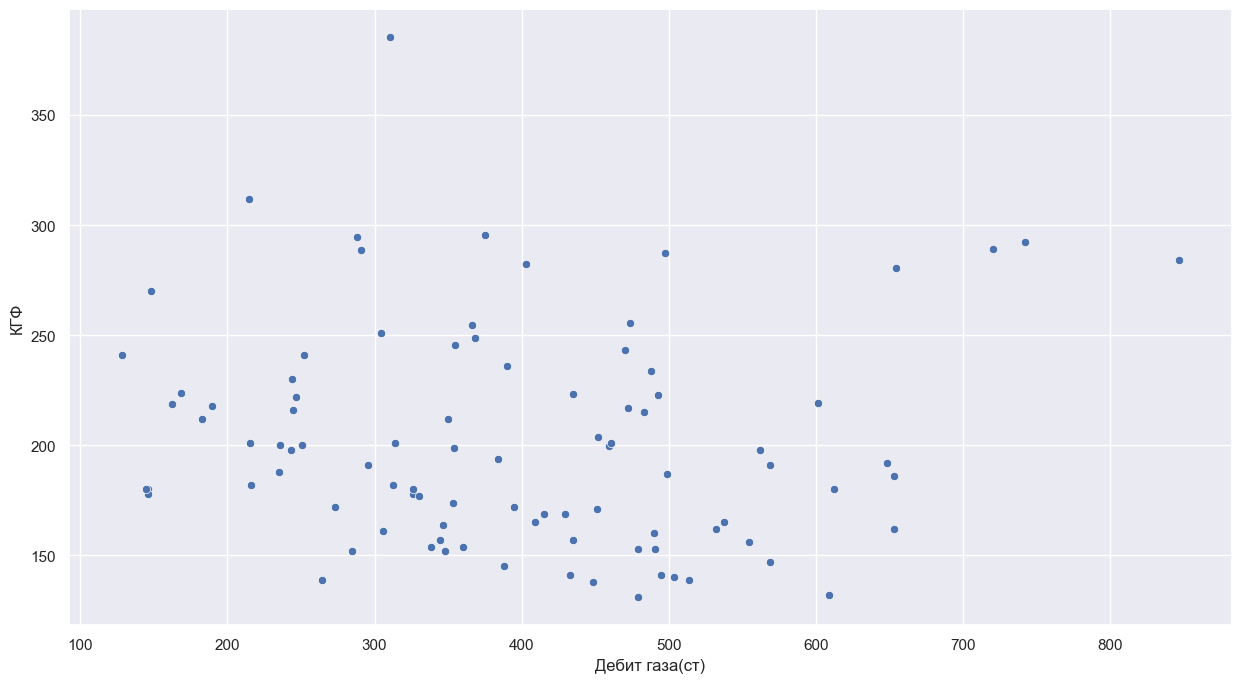

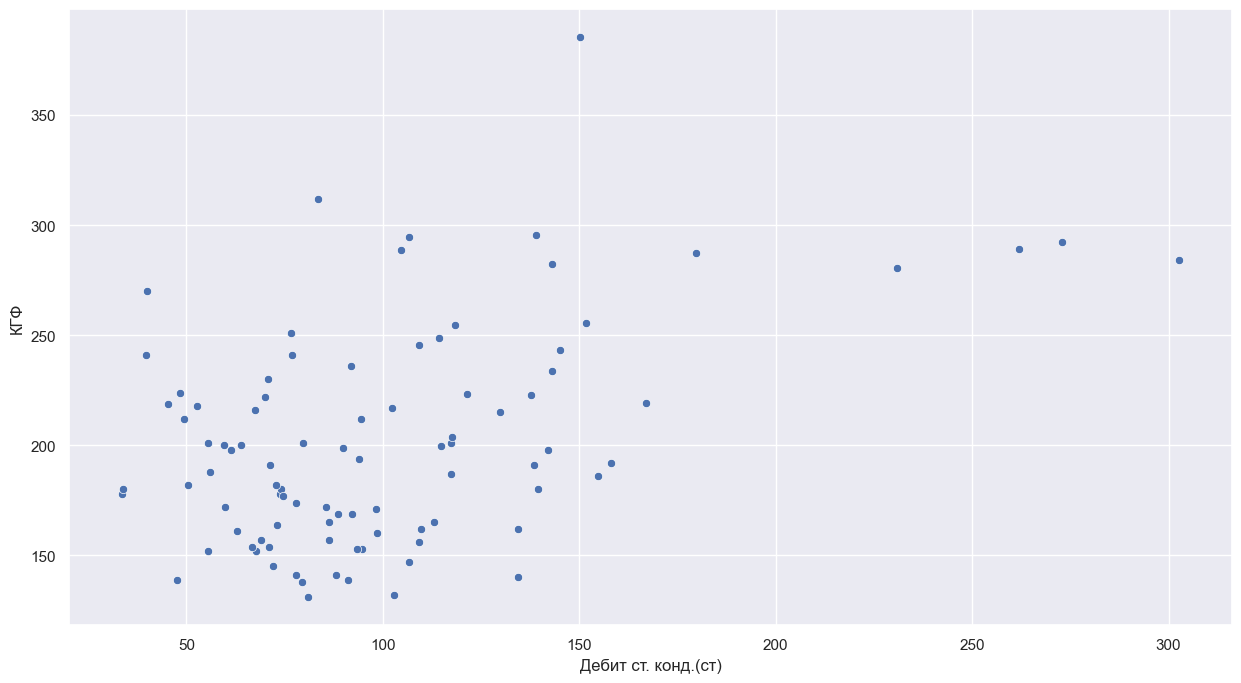

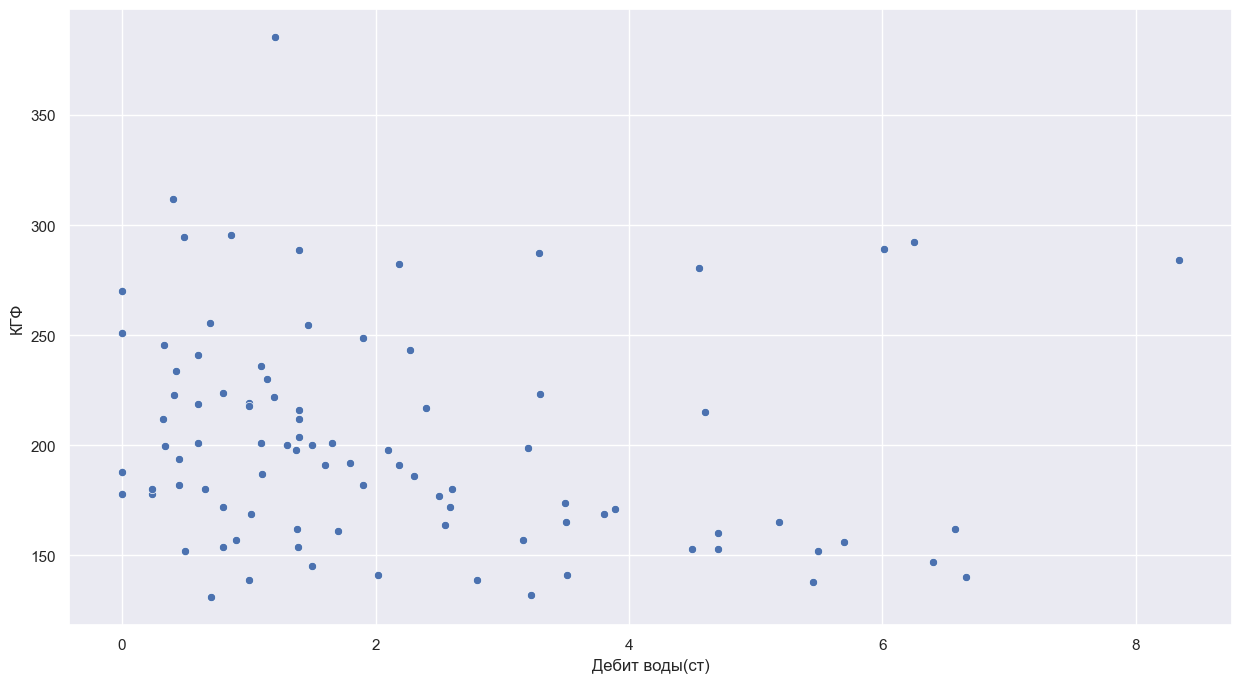

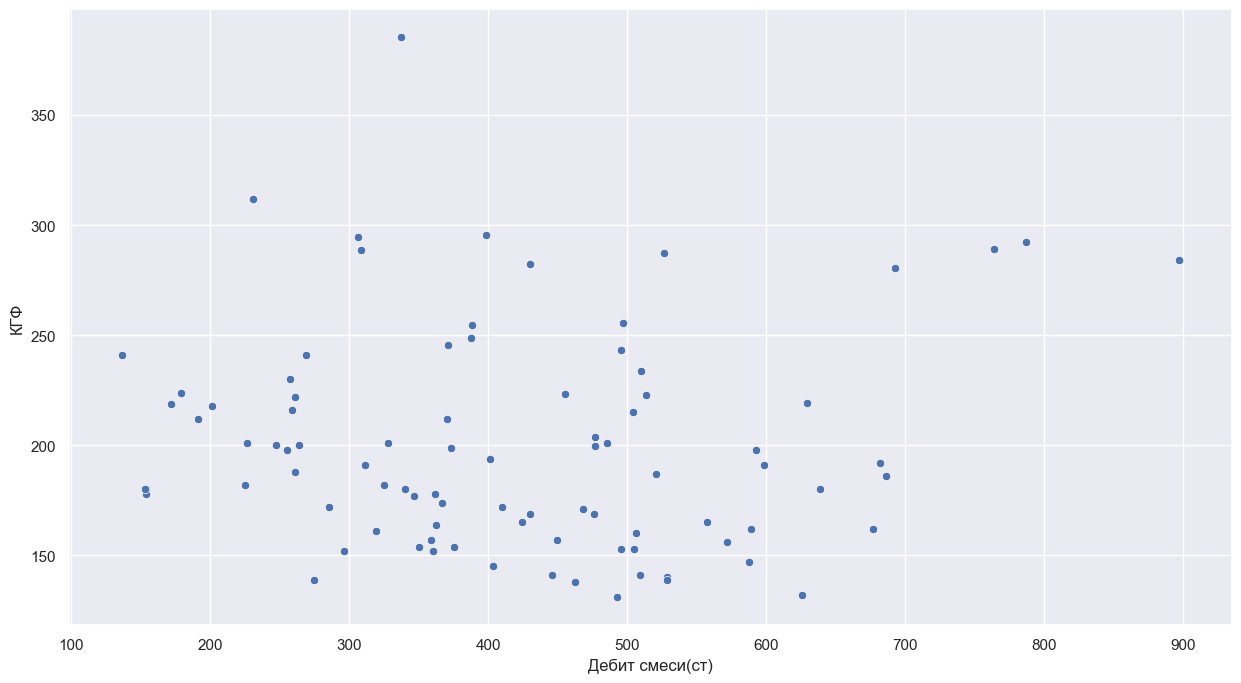

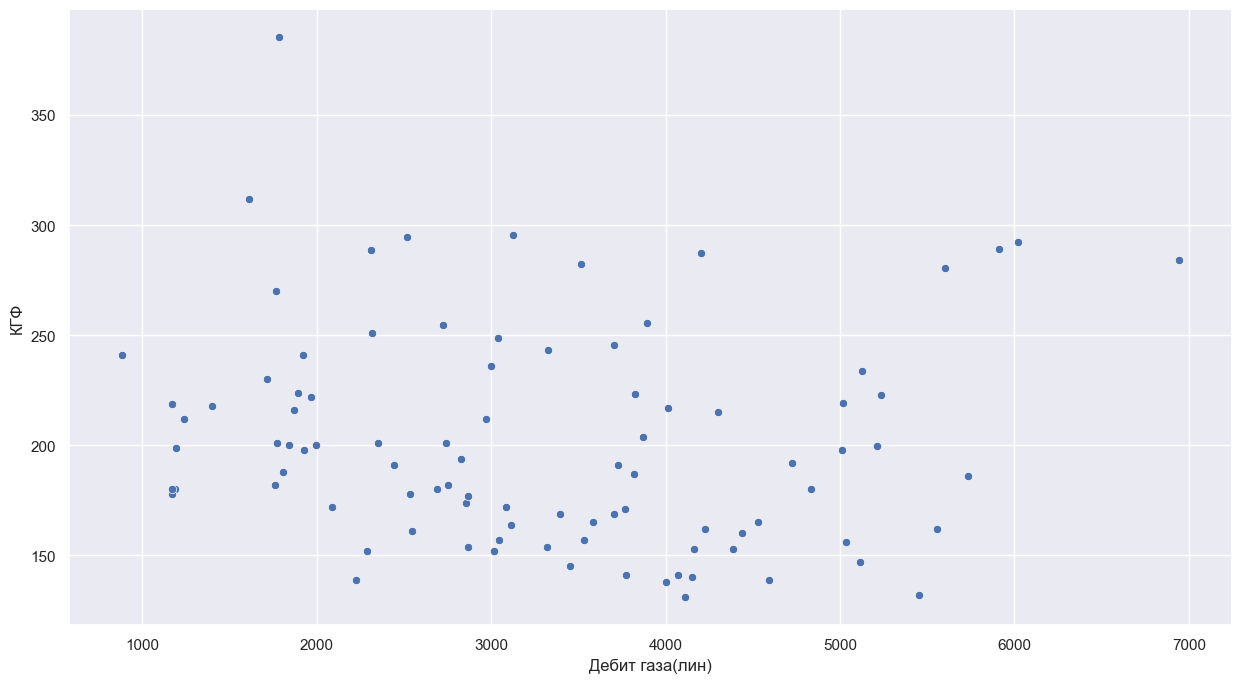

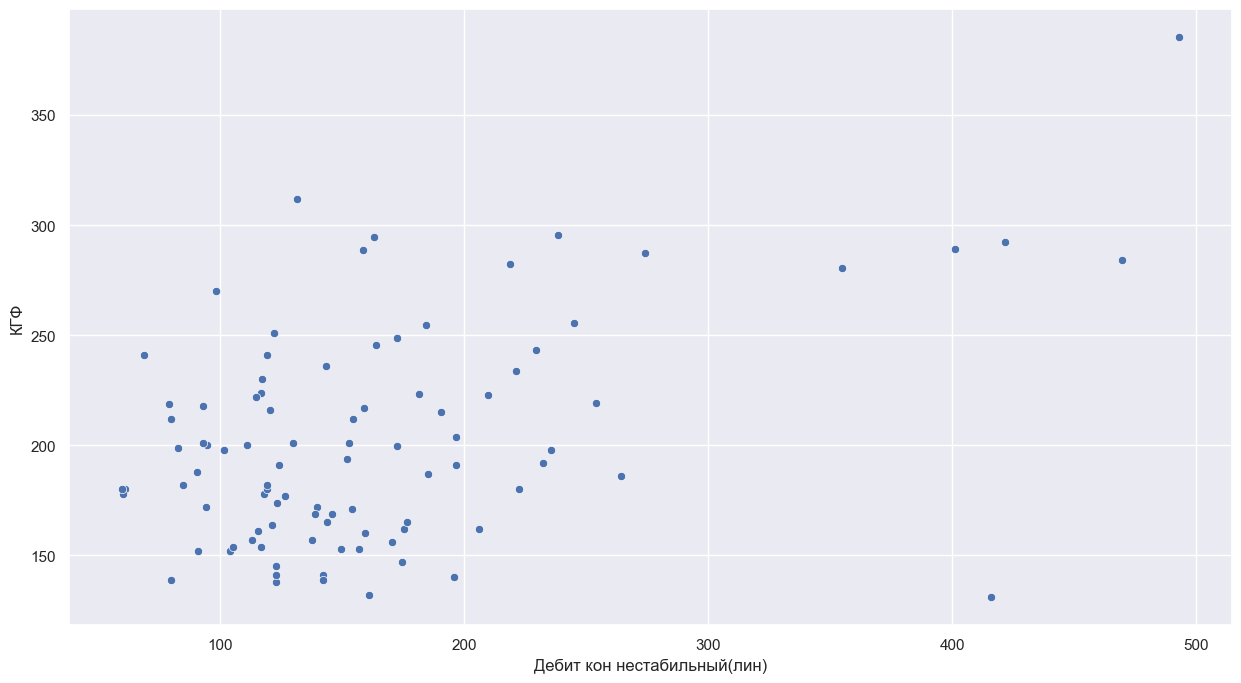

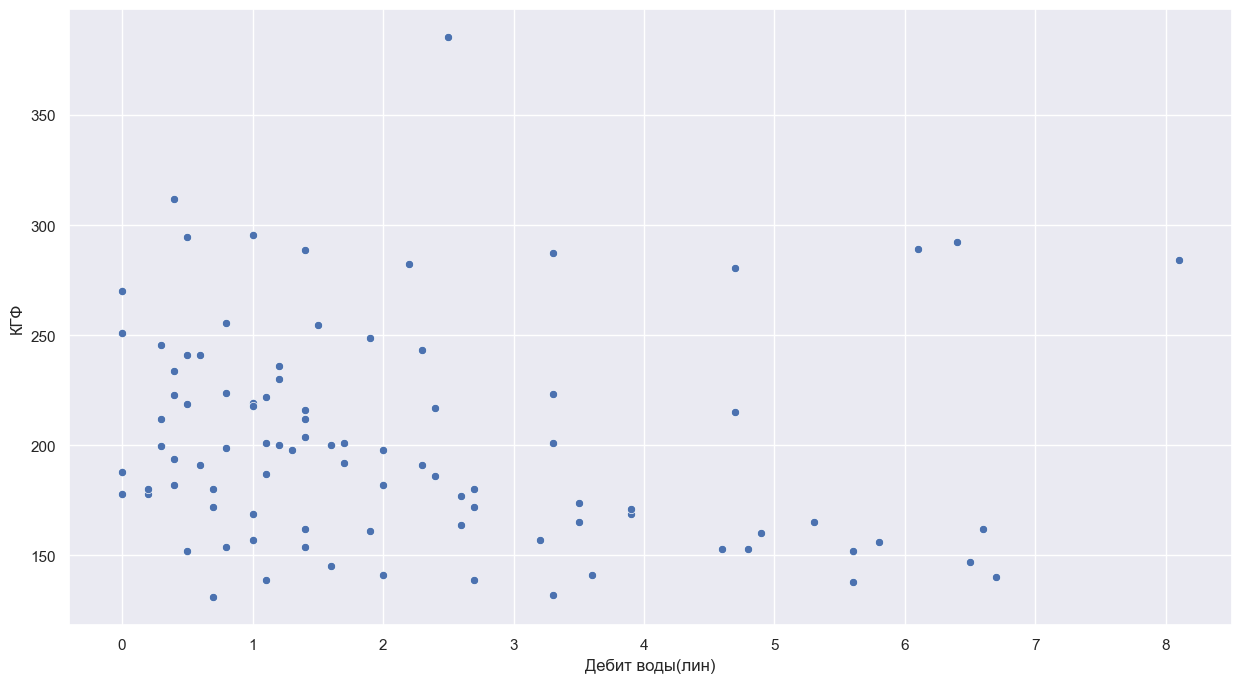

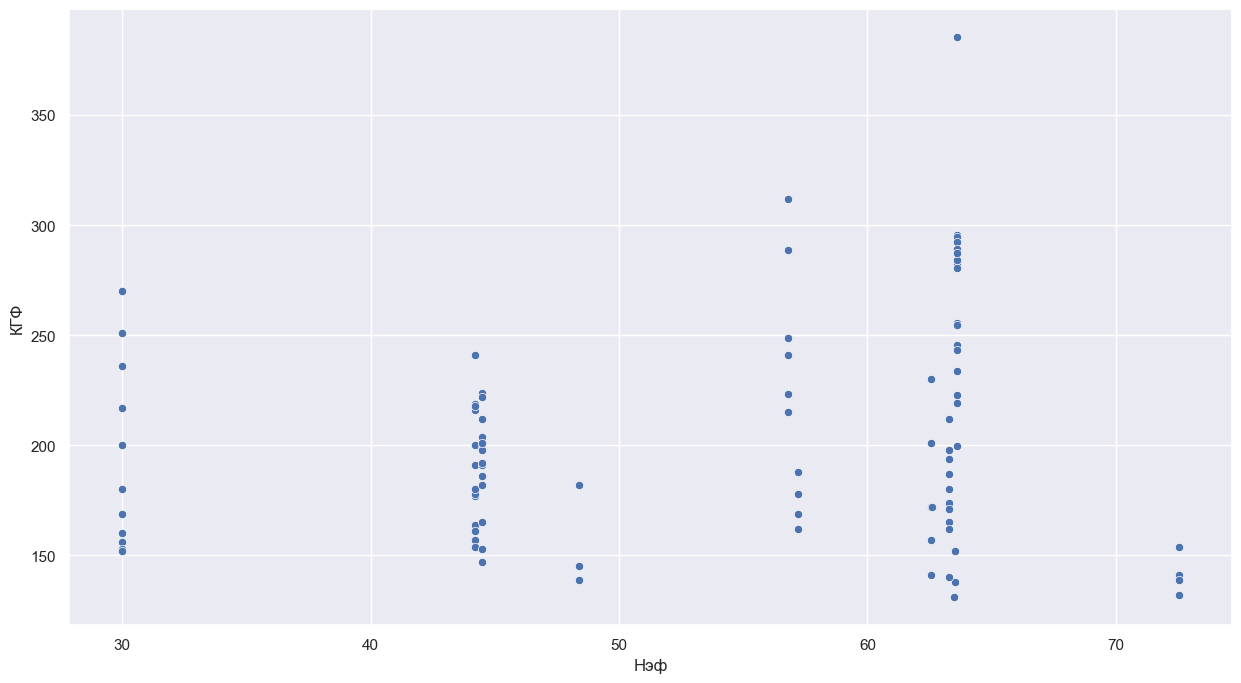

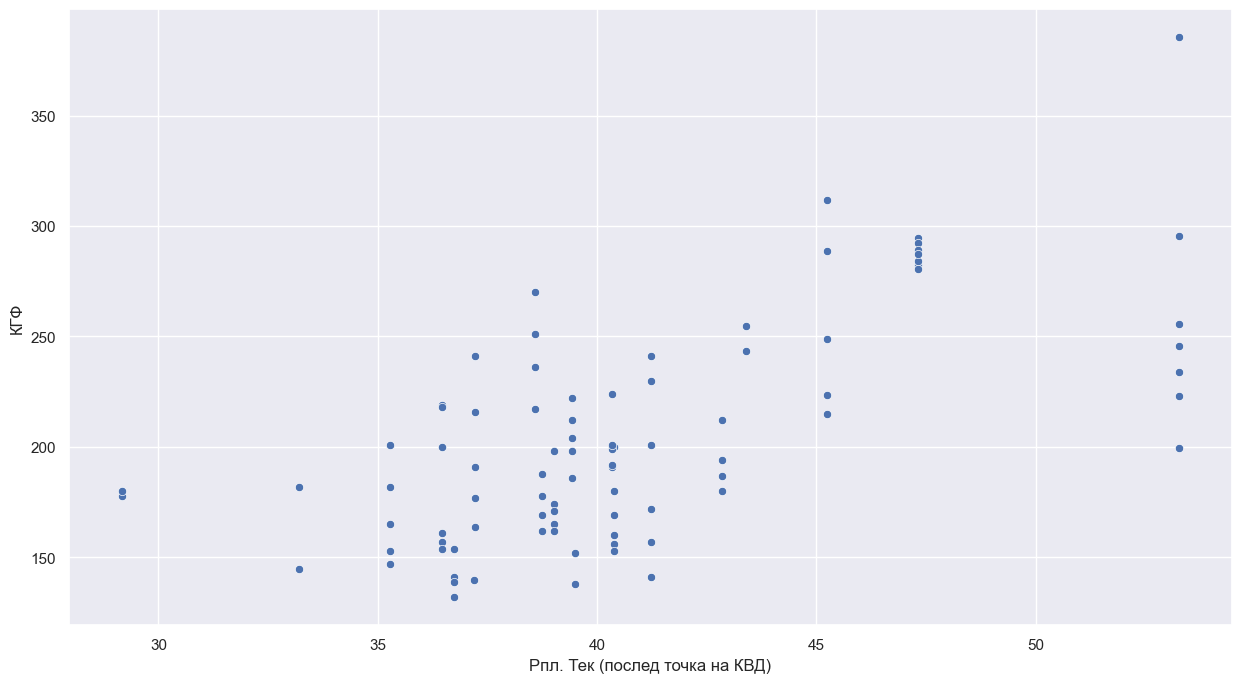

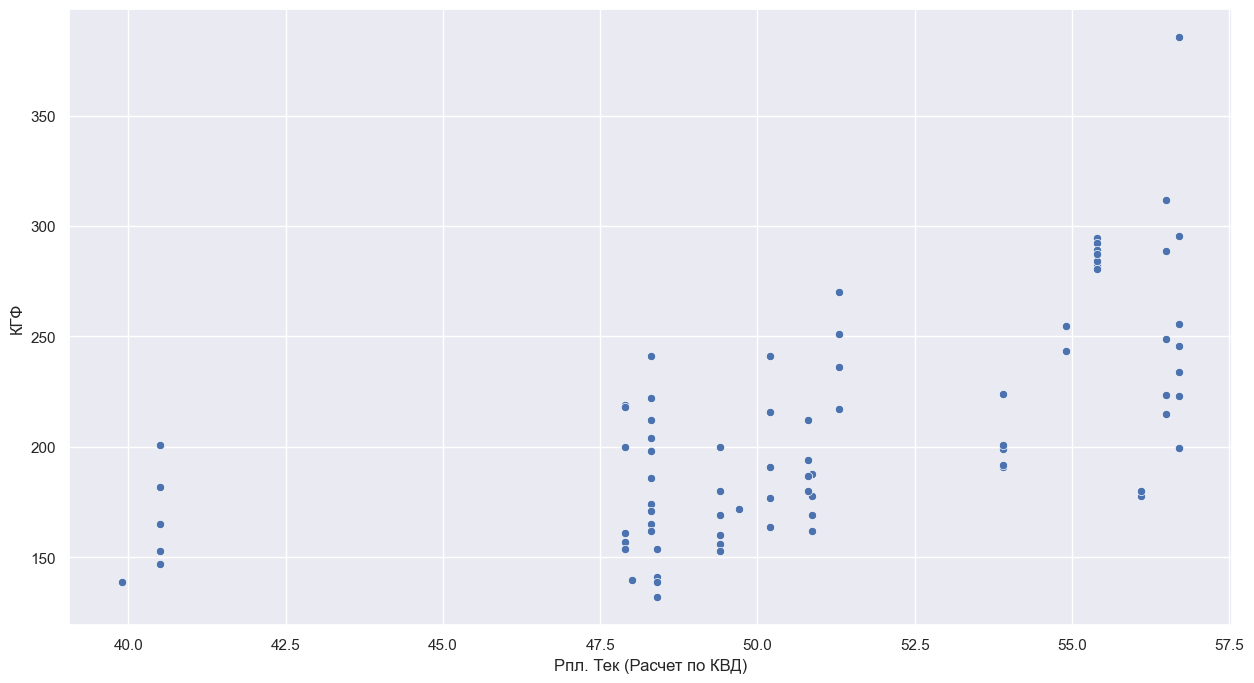

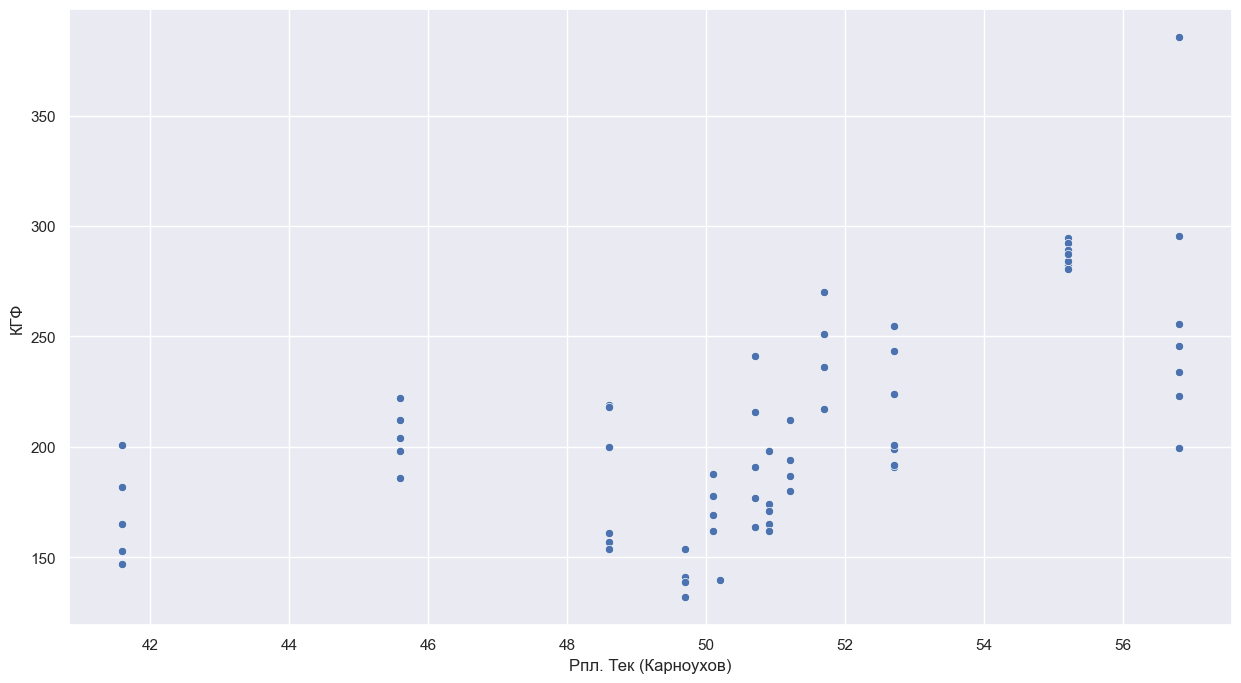

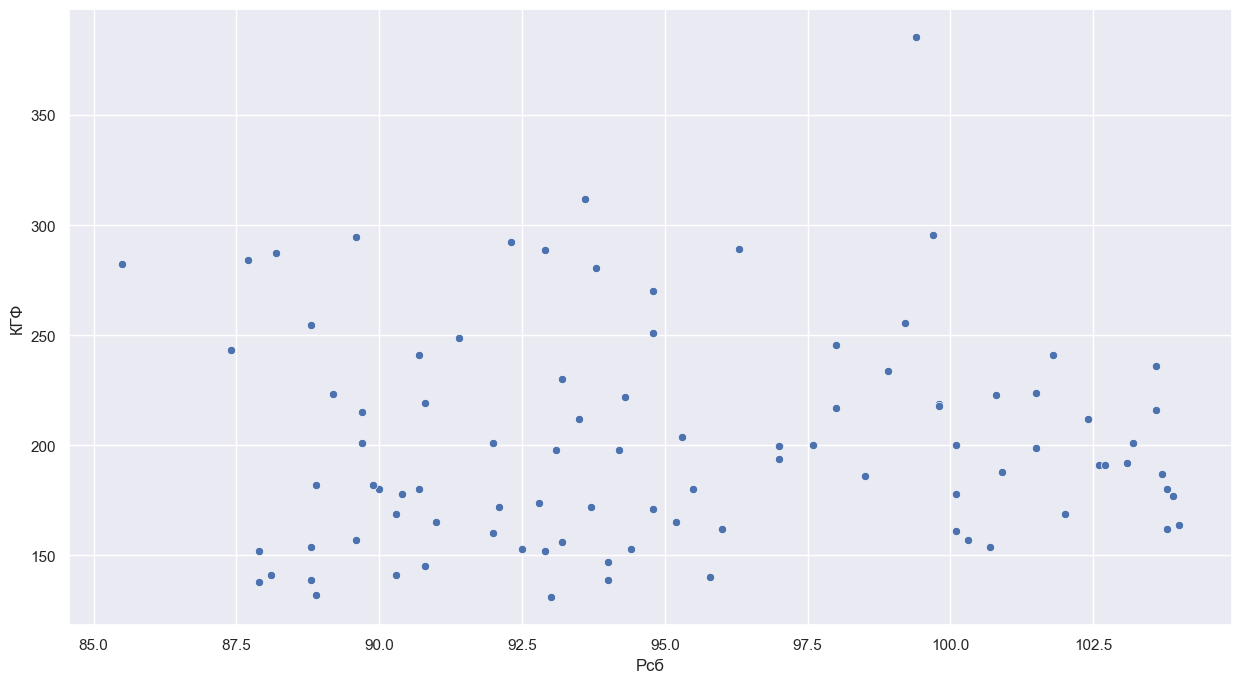

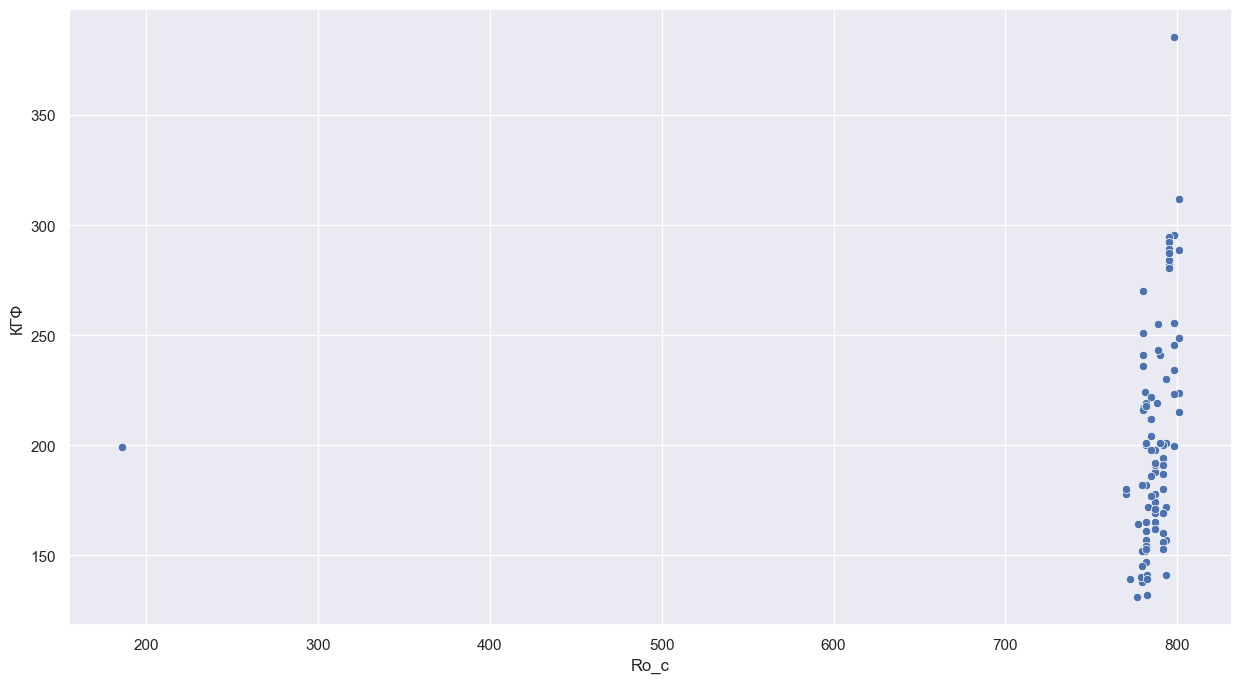

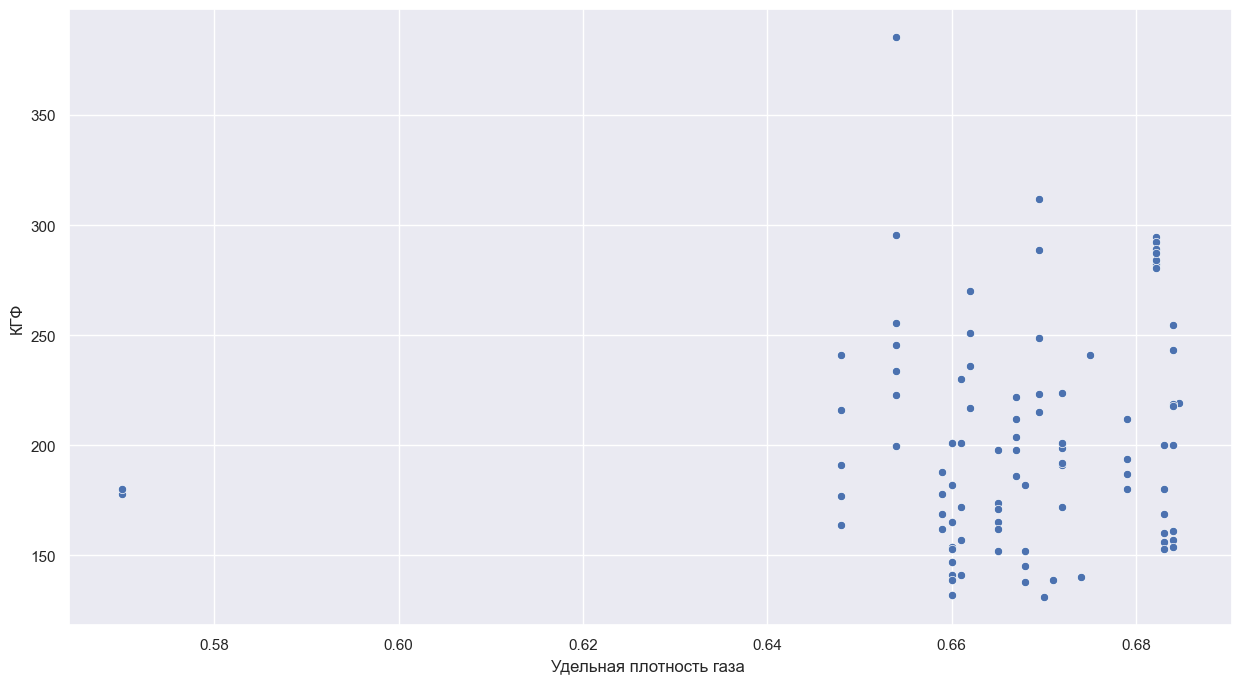

In [370]:
#scatter plot of the features compared to targets
X1=df.iloc[:, 0:26]

for i in X1.columns:
    plt.figure(i)
    sns.scatterplot(data=df, y="КГФ", x=i)
    plt.show()

#### outliers can be handled using IQR method by replacing with mean or median to reduce the effect. In the case of Ro_c, the outlier can be an error as it lies to far from normal data.

Index(['Pлин(ср)', 'Тзаб', 'Дебит газа(ст)', 'Дебит смеси(ст)',
       'Дебит газа(лин)', 'Дебит воды(лин)', 'Нэф', 'Pсб', 'Ro_c',
       'Удельная плотность газа '],
      dtype='object')


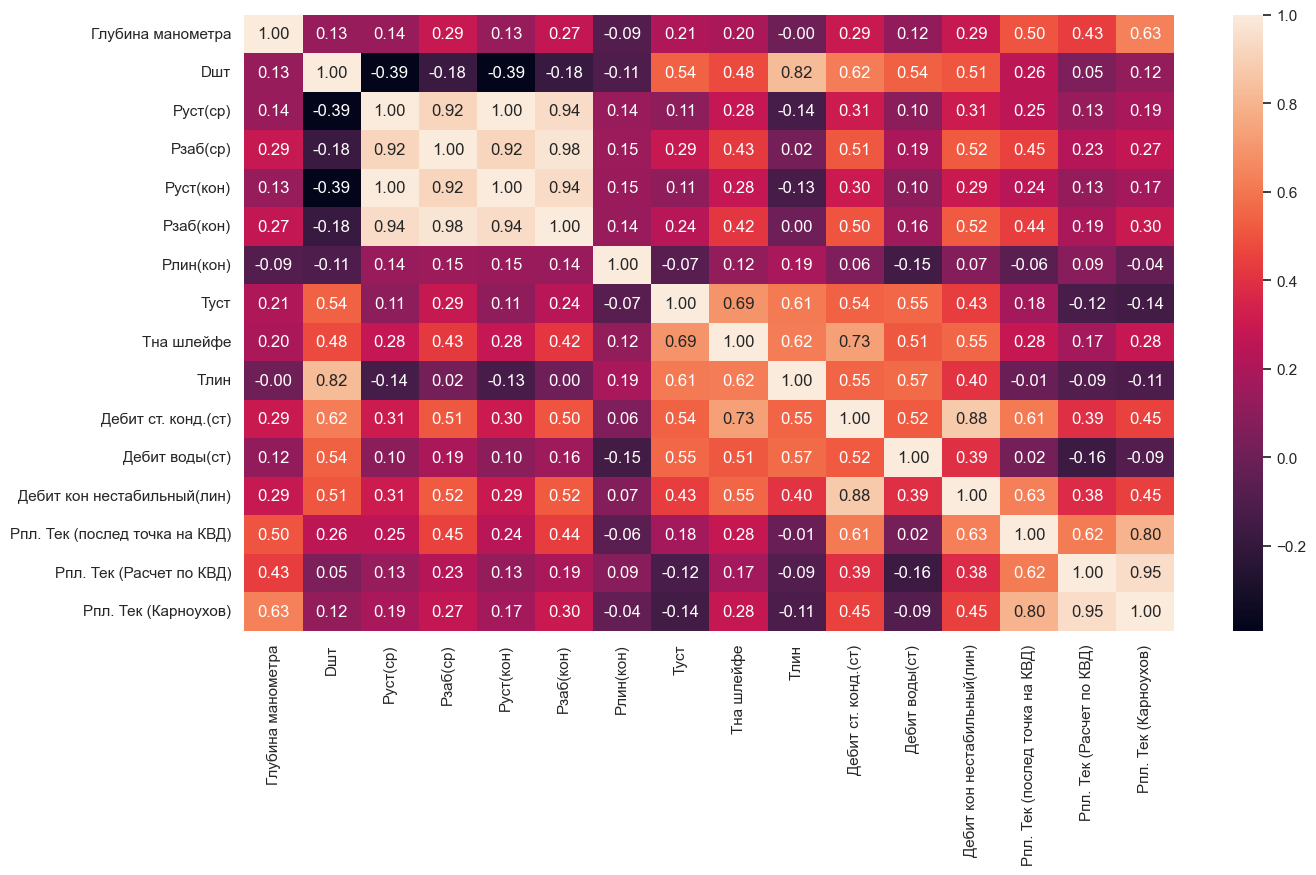

In [371]:
#checking correleation between KGF and the features
X = df.drop(df.columns[26], axis=1)
Y = df[df.columns[26]]

correlations = X.corrwith(Y)

threshold = 0.15 #inorder to identify even small correlations
correlated_features = correlations[correlations.abs() > threshold].index.tolist()
not_correlated = correlations[correlations.abs() < threshold].index.tolist()

# Choose data only with highly correlated features
X_filtered = X[correlated_features]

# It is also worth checking the correlation between the selected signs
corr_matrix = X_filtered.corr()

print(X[not_correlated].columns)


plt.figure(figsize=(15, 8))
sns.heatmap(corr_matrix, annot=True, fmt=".2f")
plt.show()

In [372]:
#dropping Руст(кон), Руст(ср), Рзаб(кон) because of the high correlation. Рзаб(ср) will be enough to represent them. instead of four correlated features now we have one.
#dropping 'Рпл. Тек (Карноухов)','Рпл. Тек (Расчет по КВД) because of the correlation with Рпл. Тек (послед точка на КВД). I will keep it because it has high importance.
#dropping 'Dшт' because it has low importance and is strongly correlated to targets. 
dropped_feats['Руст(кон)'] = dropped_feats['Руст(ср)'] = dropped_feats['Рзаб(кон)'] = 'High correlation with Рзаб(ср) and has lower importance.'
dropped_feats['Рпл. Тек (Карноухов)'] = dropped_feats['Рпл. Тек (Расчет по КВД)'] = 'High correlation with Рпл. Тек (послед точка на КВД) and low importance.'
# dropped_feats['Dшт'] = 'It has low importance and is strongly correlated to Tлин'

df = df.drop(['Руст(кон)','Руст(ср)','Рзаб(кон)','Рпл. Тек (Карноухов)','Рпл. Тек (Расчет по КВД)'], axis=1)
df.head()

Глубина манометра    Dшт  Рзаб(ср)  Pлин(ср)  Рлин(кон)  Туст  Тна шлейфе  \
0             3576.3   7.94     370.1     101.8      101.8  53.0        31.7   
1             3576.3   9.53     364.6     101.3      102.4  58.8        37.6   
2             3576.3  11.11     357.1     101.6      100.6  63.6        42.8   
3             3576.3  12.70     347.4      98.4       99.0  64.7        46.2   
4             3576.3  14.29     337.7      99.2       99.5  64.0        49.4   

    Тзаб  Tлин  Дебит газа(ст)  Дебит ст. конд.(ст)  Дебит воды(ст)  \
0  103.2  32.5         214.704                 83.6             0.4   
1  103.0  38.6         290.594                104.7             1.4   
2  102.6  43.4         368.042                114.3             1.9   
3  102.0  46.1         434.663                121.3             3.3   
4  104.4  49.9         483.283                129.8             4.6   

   Дебит смеси(ст)  Дебит газа(лин)  Дебит кон нестабильный(лин)  \
0        231.24884      1610.368866                        131.3   
1        309.00166      2310.226429                        158.5   
2        388.11498      3039.489680                        172.3   
3        455.21452      3824.082686                        181.5   
4        504.58778      4299.104676                        190.6   

   Дебит воды(лин)   Нэф  Рпл. Тек (послед точка на КВД)   Pсб   Ro_c  \
0              0.4  56.8                           45.25  93.6  801.0   
1              1.4  56.8                           45.25  92.9  801.0   
2              1.9  56.8                           45.25  91.4  801.0   
3              3.3  56.8                           45.25  89.2  801.0   
4              4.7  56.8                           45.25  89.7  801.0   

   Удельная плотность газа        КГФ  
0                  0.669449  311.9094  
1                  0.669449  288.6003  
2                  0.669449  248.7906  
3                  0.669449  223.5591  
4                  0.669449  215.1486

In [373]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 93 entries, 0 to 92
Data columns (total 22 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   Глубина манометра               90 non-null     float64
 1   Dшт                             93 non-null     float64
 2   Рзаб(ср)                        90 non-null     float64
 3   Pлин(ср)                        93 non-null     float64
 4   Рлин(кон)                       93 non-null     float64
 5   Туст                            93 non-null     float64
 6   Тна шлейфе                      60 non-null     float64
 7   Тзаб                            90 non-null     float64
 8   Tлин                            93 non-null     float64
 9   Дебит газа(ст)                  93 non-null     float64
 10  Дебит ст. конд.(ст)             93 non-null     float64
 11  Дебит воды(ст)                  93 non-null     float64
 12  Дебит смеси(ст)                 89 non

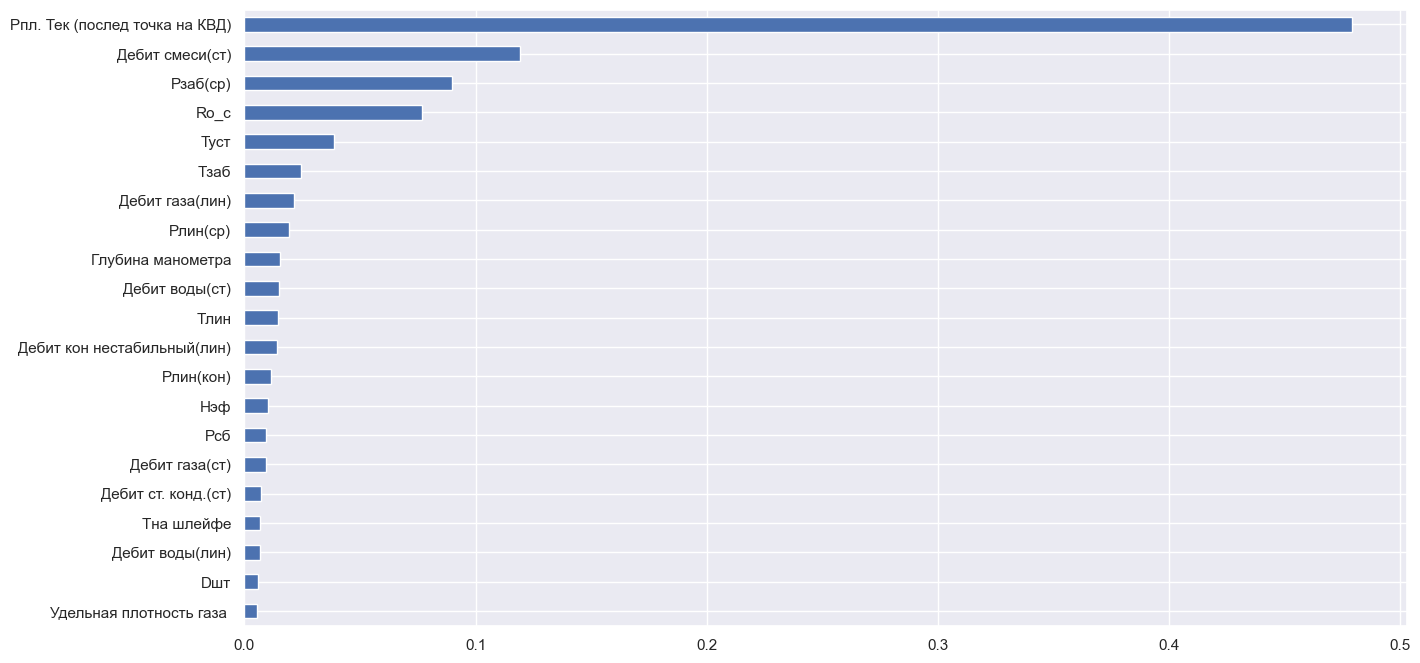

In [374]:
df1 = df.fillna(-100)
X=df1.drop(df1.columns[21], axis=1)
Y=df1[df1.columns[21]]
feature_importance(X, Y)

In [375]:
#dropping 'Дебит ст. конд.(ст)' because it has high correlation with Дебит кон нестабильный and has low importance
#dropping 'Дебит воды(лин)' because it has high correlation with Дебит воды(ст) and the latter has higher importance
#dropping 'Дебит газа(ст)' and 'Дебит газа(лин)' because they have high correlation with Дебит смеси(ст) but has higher importance
dropped_feats['Дебит ст. конд.(ст)'] = 'it has high correlation with Дебит кон нестабильный and has low importance.'
dropped_feats['Дебит воды(лин)'] = 'it has high correlation with Дебит воды(ст) and the latter has higher importance.'
dropped_feats['Дебит газа(ст)'] = dropped_feats['Дебит газа(лин)'] = 'it has high correlation with Дебит смеси(ст) but has higher importance.'
df = df.drop(['Дебит ст. конд.(ст)', 'Дебит воды(лин)', 'Дебит газа(ст)', 'Дебит газа(лин)'], axis=1)
df.head()

Глубина манометра    Dшт  Рзаб(ср)  Pлин(ср)  Рлин(кон)  Туст  Тна шлейфе  \
0             3576.3   7.94     370.1     101.8      101.8  53.0        31.7   
1             3576.3   9.53     364.6     101.3      102.4  58.8        37.6   
2             3576.3  11.11     357.1     101.6      100.6  63.6        42.8   
3             3576.3  12.70     347.4      98.4       99.0  64.7        46.2   
4             3576.3  14.29     337.7      99.2       99.5  64.0        49.4   

    Тзаб  Tлин  Дебит воды(ст)  Дебит смеси(ст)  Дебит кон нестабильный(лин)  \
0  103.2  32.5             0.4        231.24884                        131.3   
1  103.0  38.6             1.4        309.00166                        158.5   
2  102.6  43.4             1.9        388.11498                        172.3   
3  102.0  46.1             3.3        455.21452                        181.5   
4  104.4  49.9             4.6        504.58778                        190.6   

    Нэф  Рпл. Тек (послед точка на КВД)   Pсб   Ro_c  \
0  56.8                           45.25  93.6  801.0   
1  56.8                           45.25  92.9  801.0   
2  56.8                           45.25  91.4  801.0   
3  56.8                           45.25  89.2  801.0   
4  56.8                           45.25  89.7  801.0   

   Удельная плотность газа        КГФ  
0                  0.669449  311.9094  
1                  0.669449  288.6003  
2                  0.669449  248.7906  
3                  0.669449  223.5591  
4                  0.669449  215.1486

In [376]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 93 entries, 0 to 92
Data columns (total 18 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   Глубина манометра               90 non-null     float64
 1   Dшт                             93 non-null     float64
 2   Рзаб(ср)                        90 non-null     float64
 3   Pлин(ср)                        93 non-null     float64
 4   Рлин(кон)                       93 non-null     float64
 5   Туст                            93 non-null     float64
 6   Тна шлейфе                      60 non-null     float64
 7   Тзаб                            90 non-null     float64
 8   Tлин                            93 non-null     float64
 9   Дебит воды(ст)                  93 non-null     float64
 10  Дебит смеси(ст)                 89 non-null     float64
 11  Дебит кон нестабильный(лин)     93 non-null     float64
 12  Нэф                             93 non

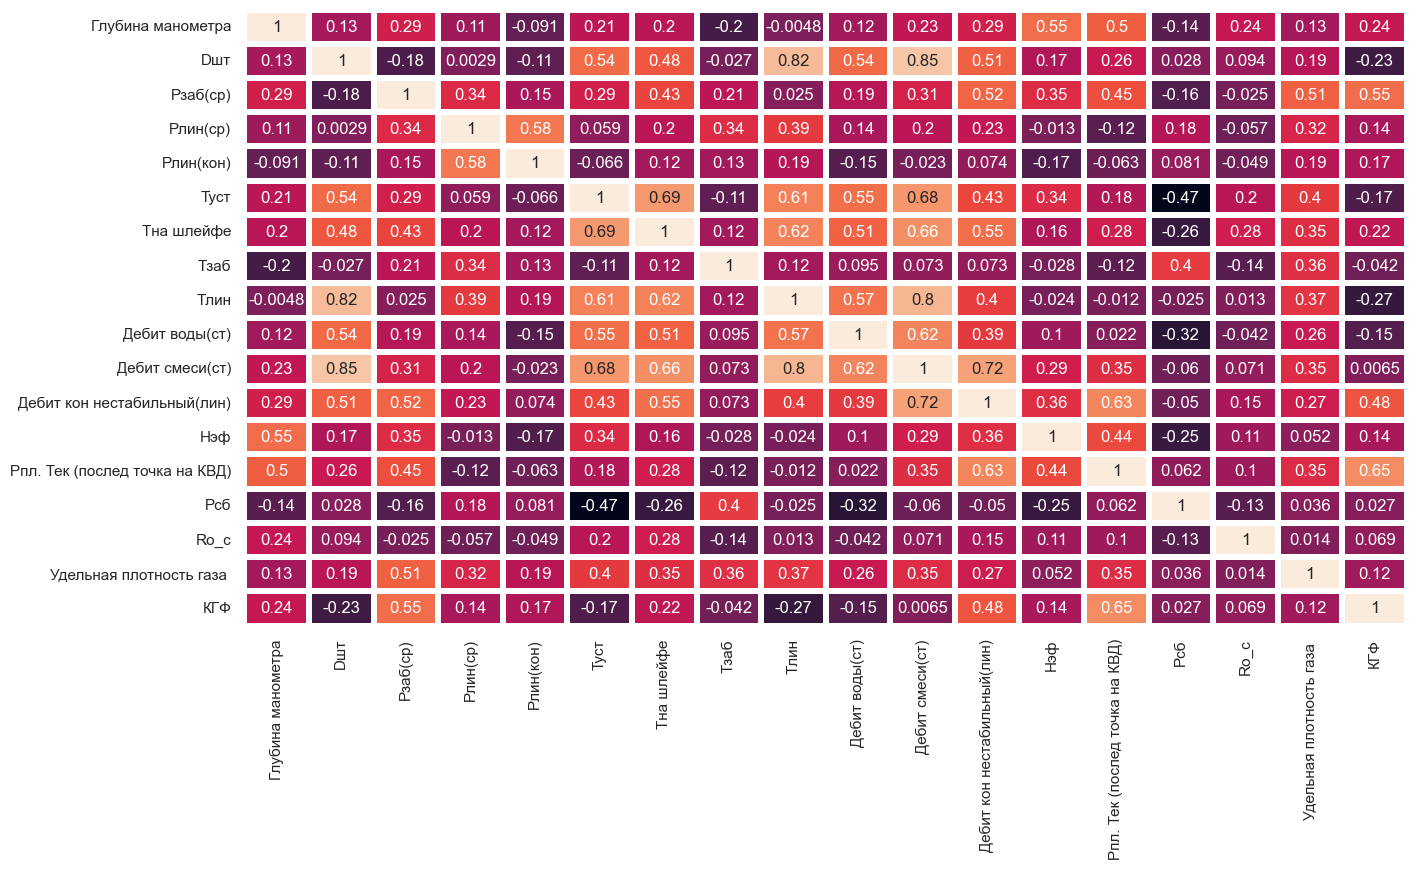

In [377]:
make_heat_map(df)

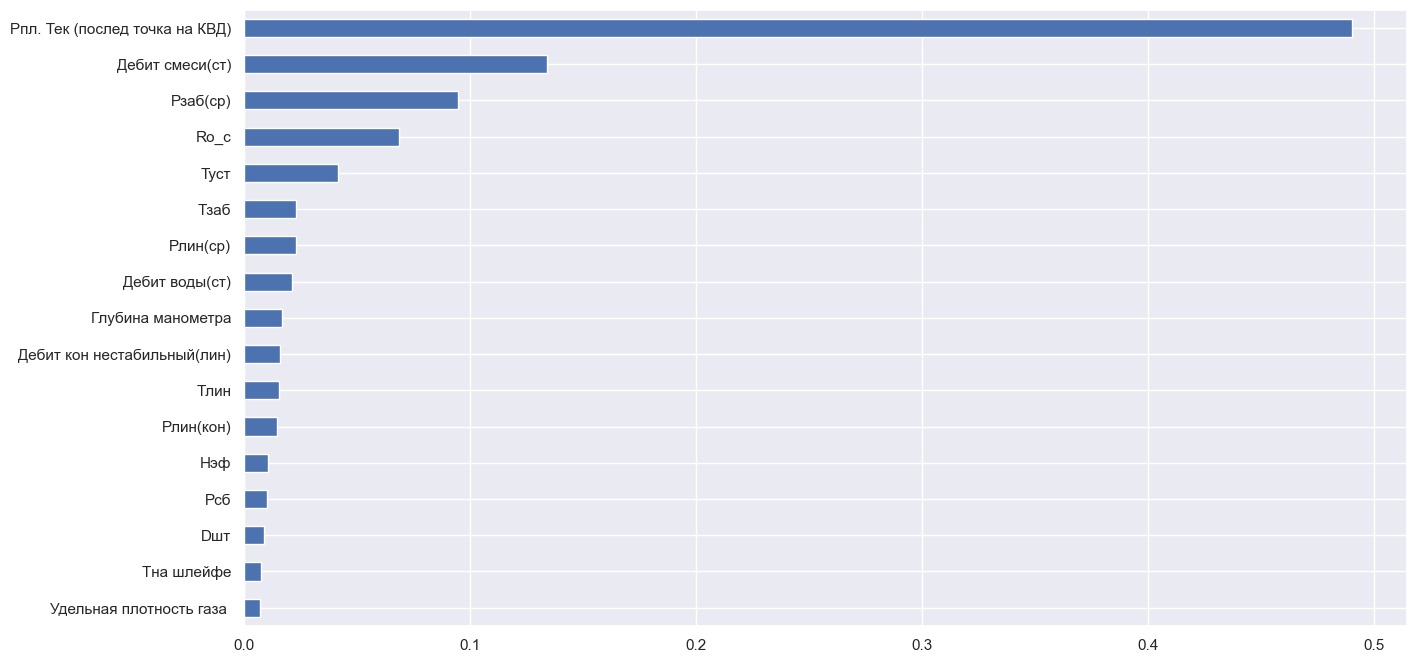

In [378]:
df1 = df.fillna(-100)
X = df1.drop(df1.columns[17], axis=1)
Y = df[df.columns[17]]

feature_importance(X , Y)

In [379]:
#dropping Tлин because it has high correlation with Дебит смеси(ст) and it has lower importance
#dropping Дебит кон нестабильный(лин) because it has Дебит смеси(ст) and it has lower importance. i know 0.72 is considered to be below 0.80 but it is high compared to the other features

dropped_feats['Tлин'] = 'it has high correlation with Дебит смеси(ст) and it has lower importance.'
dropped_feats['Дебит кон нестабильный(лин)'] = 'it has Дебит смеси(ст) and it has lower importance.'
dropped_feats['Pсб'] = 'it has low correlation with the target and low importance'
dropped_feats['Рлин(кон)'] = 'it is similar to Pлин(ср) and from the name the latter seems to be an avarage.'
df = df.drop(columns=['Tлин', 'Дебит кон нестабильный(лин)', 'Pсб', 'Рлин(кон)'])
df.head()

Глубина манометра    Dшт  Рзаб(ср)  Pлин(ср)  Туст  Тна шлейфе   Тзаб  \
0             3576.3   7.94     370.1     101.8  53.0        31.7  103.2   
1             3576.3   9.53     364.6     101.3  58.8        37.6  103.0   
2             3576.3  11.11     357.1     101.6  63.6        42.8  102.6   
3             3576.3  12.70     347.4      98.4  64.7        46.2  102.0   
4             3576.3  14.29     337.7      99.2  64.0        49.4  104.4   

   Дебит воды(ст)  Дебит смеси(ст)   Нэф  Рпл. Тек (послед точка на КВД)  \
0             0.4        231.24884  56.8                           45.25   
1             1.4        309.00166  56.8                           45.25   
2             1.9        388.11498  56.8                           45.25   
3             3.3        455.21452  56.8                           45.25   
4             4.6        504.58778  56.8                           45.25   

    Ro_c  Удельная плотность газа        КГФ  
0  801.0                  0.669449  311.9094  
1  801.0                  0.669449  288.6003  
2  801.0                  0.669449  248.7906  
3  801.0                  0.669449  223.5591  
4  801.0                  0.669449  215.1486

In [380]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 93 entries, 0 to 92
Data columns (total 14 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   Глубина манометра               90 non-null     float64
 1   Dшт                             93 non-null     float64
 2   Рзаб(ср)                        90 non-null     float64
 3   Pлин(ср)                        93 non-null     float64
 4   Туст                            93 non-null     float64
 5   Тна шлейфе                      60 non-null     float64
 6   Тзаб                            90 non-null     float64
 7   Дебит воды(ст)                  93 non-null     float64
 8   Дебит смеси(ст)                 89 non-null     float64
 9   Нэф                             93 non-null     float64
 10  Рпл. Тек (послед точка на КВД)  88 non-null     float64
 11  Ro_c                            93 non-null     float64
 12  Удельная плотность газа         93 non

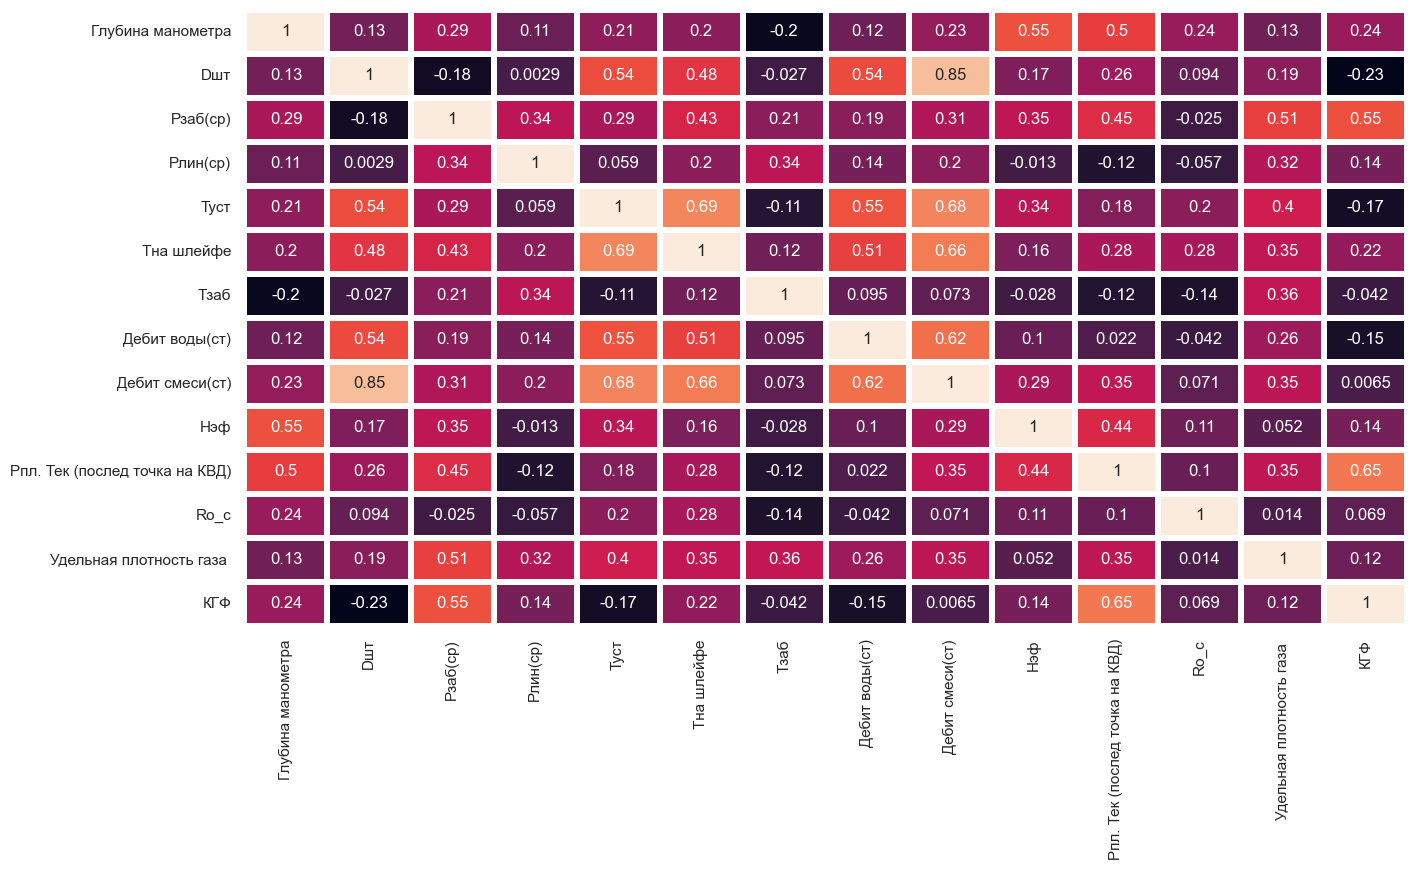

In [381]:
make_heat_map(df)

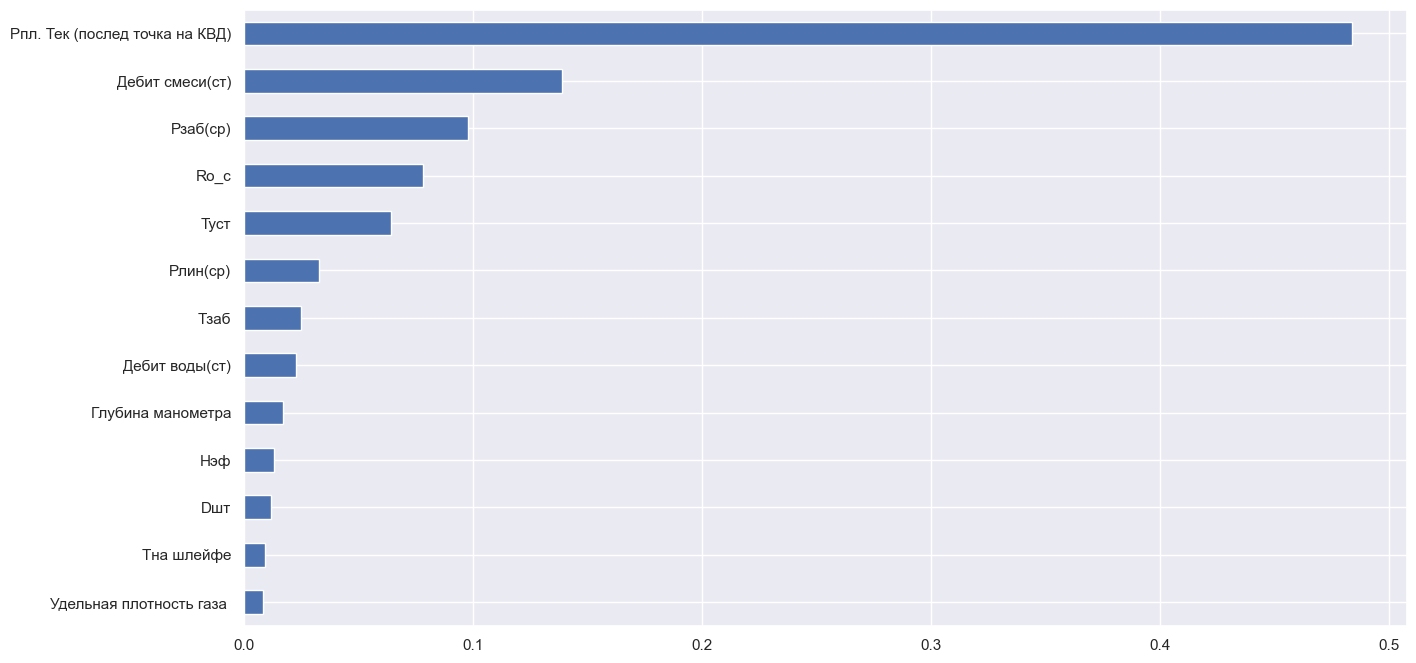

In [382]:
df1 = df.fillna(-100)
X = df1.drop(df1.columns[13], axis=1)
Y = df[df.columns[13]]

feature_importance(X , Y)


In [383]:
dropped_feats

{'G_total': 'it has many missing values and KGF and G_total only defer in unit of measurement',
 'Ro_g': 'Has too many missing elements',
 'Ro_w': 'Has a power of 1 and many missing elements',
 'Руст(кон)': 'High correlation with Рзаб(ср) and has lower importance.',
 'Руст(ср)': 'High correlation with Рзаб(ср) and has lower importance.',
 'Рзаб(кон)': 'High correlation with Рзаб(ср) and has lower importance.',
 'Рпл. Тек (Карноухов)': 'High correlation with Рпл. Тек (послед точка на КВД) and low importance.',
 'Рпл. Тек (Расчет по КВД)': 'High correlation with Рпл. Тек (послед точка на КВД) and low importance.',
 'Дебит ст. конд.(ст)': 'it has high correlation with Дебит кон нестабильный and has low importance.',
 'Дебит воды(лин)': 'it has high correlation with Дебит воды(ст) and the latter has higher importance.',
 'Дебит газа(ст)': 'it has high correlation with Дебит смеси(ст) but has higher importance.',
 'Дебит газа(лин)': 'it has high correlation with Дебит смеси(ст) but has high

In [384]:
def remove_outliers_and_fill_mean(df):
    for column in df.columns:
        # Calculate Q1 (25th percentile) and Q3 (75th percentile)
        Q1 = df[column].quantile(0.25)
        Q3 = df[column].quantile(0.75)
        IQR = Q3 - Q1

        # Determine the bounds for outliers
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR

        # Identify outliers
        outliers = (df[column] < lower_bound) | (df[column] > upper_bound)

        # Replace outliers with NaN
        df.loc[outliers, column] = np.nan

        # Fill NaN values with the mean of the column
        df[column].fillna(df[column].mean(), inplace=True)

    return df

# Process the DataFrame
cleaned_df = remove_outliers_and_fill_mean(df)
cleaned_df

C:\Users\mewie\AppData\Local\Temp\ipykernel_7088\4166474022.py:19: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df[column].fillna(df[column].mean(), inplace=True)
C:\Users\mewie\AppData\Local\Temp\ipykernel_7088\4166474022.py:19: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For e

Глубина манометра    Dшт    Рзаб(ср)    Pлин(ср)       Туст  Тна шлейфе  \
0         3576.300000   7.94  370.100000  101.800000  53.000000   31.700000   
1         3576.300000   9.53  364.600000  101.300000  58.800000   37.600000   
2         3576.300000  11.11  357.100000  101.600000  63.600000   42.800000   
3         3576.300000  12.70  347.400000   98.400000  64.700000   46.200000   
4         3576.300000  14.29  337.700000   99.200000  64.000000   49.400000   
5         3576.300000   9.53  286.400000  106.361669  57.500000   38.800000   
6         3667.000000   7.94  354.333525  102.932004  56.000000   37.801818   
7         3667.000000   9.53  350.200000  103.186902  61.000000   37.801818   
8         3667.000000  11.11  344.000000  105.671499  65.000000   37.801818   
9         3667.000000  12.70  336.700000  108.100063  42.000000   37.801818   
10        3579.000000   7.94  365.860000  103.471415  52.000000   27.200000   
11        3579.000000   9.53  342.270000  103.200466  58.000000   34.600000   
12        3579.000000  11.11  312.270000  103.187111  61.000000   41.200000   
13        3579.000000  12.70  291.740000  103.229928  62.000000   43.700000   
14        3579.000000  14.29  263.030000  107.377560  63.000000   49.200000   
15        3582.500000   9.53  292.000000  105.507978  56.000000   37.400000   
16        3653.000000   7.94  440.500000  108.886435  37.000000   14.000000   
17        3653.000000   9.53  388.700000   89.652839  48.000000   21.000000   
18        3653.000000  12.70  308.800000   97.877045  54.000000   35.000000   
19        3653.000000  14.29  270.500000  100.622979  52.000000   34.000000   
20        3653.000000  15.88  239.300000  100.622979  51.000000   38.000000   
21        3653.000000  14.29  251.300000  100.622979  50.000000   37.801818   
22        3653.000000  11.11  296.800000  100.622979  50.000000   37.801818   
23        3650.000000   7.94  458.600000   91.045545  60.000000   37.801818   
24        3650.000000   9.53  452.800000   97.787995  66.000000   37.801818   
25        3650.000000  12.70  437.300000  103.108052  74.000000   37.801818   
26        3650.000000  14.29  426.200000  107.062626  75.000000   37.801818   
27        3650.000000  15.87  414.000000  109.784475  75.000000   37.801818   
28        3650.000000  14.29  414.800000  108.633163  74.000000   37.801818   
29        3650.000000  11.11  424.500000  100.126341  70.000000   37.801818   
30        3653.000000   9.53  403.400000  111.381880  64.000000   32.000000   
31        3653.000000  11.11  399.200000  100.622979  68.000000   36.000000   
32        3524.086667  14.29  333.534865  107.555531  69.000000   37.801818   
33        3572.000000   6.35  341.500000  106.000000  57.203333   37.801818   
34        3572.000000   9.53  330.000000  105.900000  31.000000   37.801818   
35        3572.000000  11.11  316.000000  108.900000  37.000000   37.801818   
36        3572.000000  12.70  301.600000  101.700000  37.000000   37.801818   
37        3588.500000   7.94  359.900000  100.200000  57.000000   33.000000   
38        3588.500000   9.53  346.900000   98.900000  62.000000   38.500000   
39        3588.500000  11.11  330.500000   94.500000  66.000000   42.900000   
40        3588.500000  12.70  314.200000   96.900000  68.000000   47.900000   
41        3588.500000  14.29  297.500000   98.200000  68.000000   51.000000   
42        3588.500000  12.70  306.900000   97.200000  67.000000   37.801818   
43        3524.086667   9.53  333.534865  100.369642  58.000000   37.801818   
44        3478.500000   9.53  347.000000   93.852163  57.000000   34.300000   
45        3478.500000  11.11  342.000000   94.360181  60.000000   38.500000   
46        3524.086667  12.70  333.534865  102.135191  66.000000   37.801818   
47        3640.500000   6.35  403.000000  105.384230  47.000000   37.801818   
48        3640.500000   9.53  396.600000  108.491570  59.000000   37.801818   
49        3640.500000  11.11  390.000000  107.785976  

In [385]:
f, f1 = descriptive_stats(cleaned_df)
f1

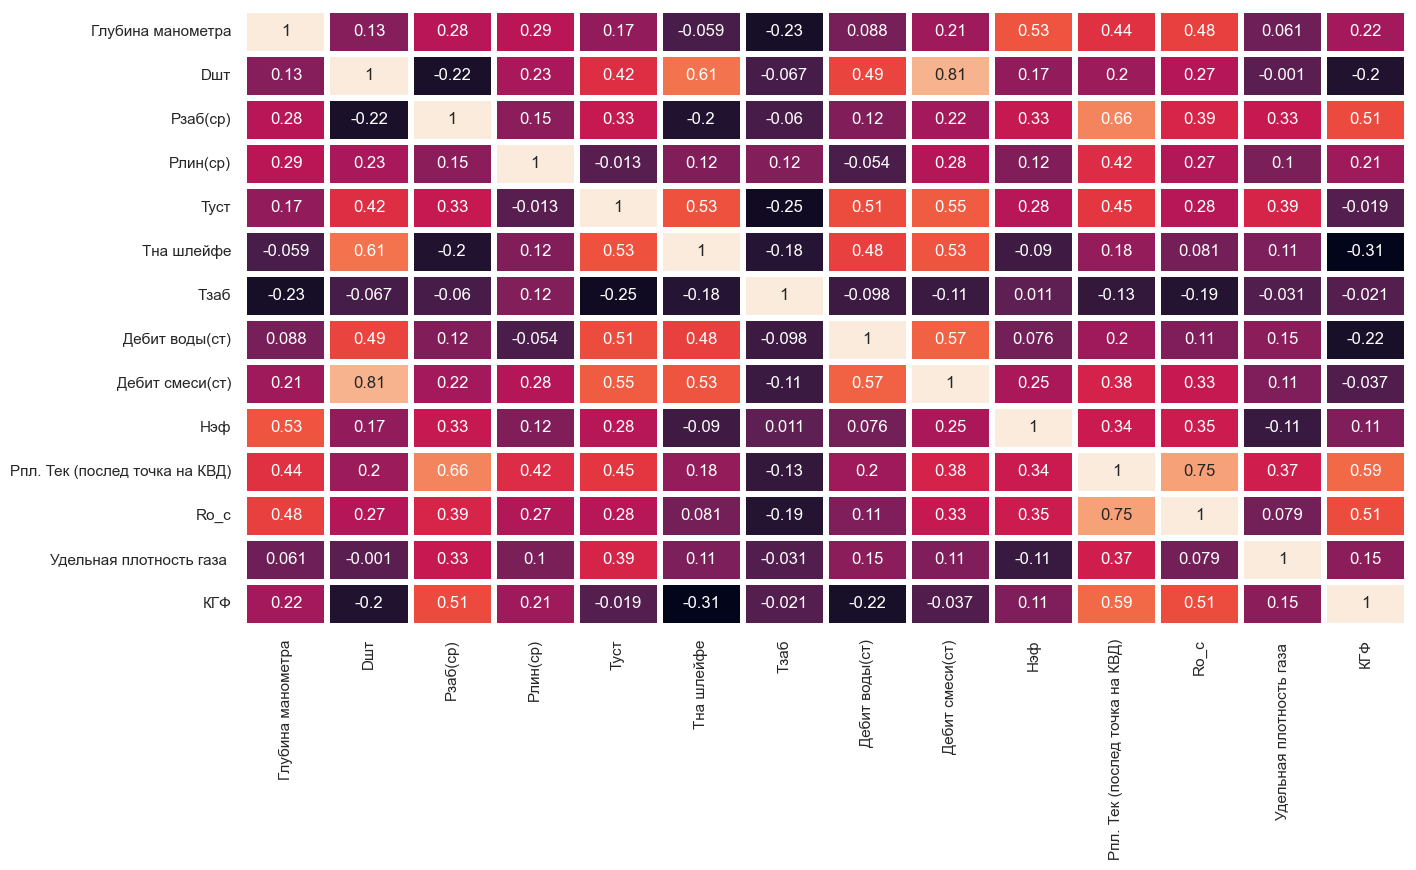

In [386]:
make_heat_map(cleaned_df)

In [387]:
dropped_feats

{'G_total': 'it has many missing values and KGF and G_total only defer in unit of measurement',
 'Ro_g': 'Has too many missing elements',
 'Ro_w': 'Has a power of 1 and many missing elements',
 'Руст(кон)': 'High correlation with Рзаб(ср) and has lower importance.',
 'Руст(ср)': 'High correlation with Рзаб(ср) and has lower importance.',
 'Рзаб(кон)': 'High correlation with Рзаб(ср) and has lower importance.',
 'Рпл. Тек (Карноухов)': 'High correlation with Рпл. Тек (послед точка на КВД) and low importance.',
 'Рпл. Тек (Расчет по КВД)': 'High correlation with Рпл. Тек (послед точка на КВД) and low importance.',
 'Дебит ст. конд.(ст)': 'it has high correlation with Дебит кон нестабильный and has low importance.',
 'Дебит воды(лин)': 'it has high correlation with Дебит воды(ст) and the latter has higher importance.',
 'Дебит газа(ст)': 'it has high correlation with Дебит смеси(ст) but has higher importance.',
 'Дебит газа(лин)': 'it has high correlation with Дебит смеси(ст) but has high

## Conclusion

Starting with the two targets, there is no need to kepp both of them as unit of measurement is the only diffrence. Which means they can be derived from each other. That's why it's is better to keep KGF as it has no missing values.

1. Ro_g and Ro_w should be dropped because of the high percentage of missing values and Ro_w has a power equal to 1 indicating repetition of data entries.
2. Руст(кон), Руст(ср), Рзаб(кон) and Рзаб(ср) have high correlation to each other. This is enough to determine that not all of them are necessary. Рзаб(ср) will be enough to represent them as it has high importance in regards to the target.
3. Dropping 'Рпл. Тек (Карноухов)','Рпл. Тек (Расчет по КВД) because of the correlation with Рпл. Тек (послед точка на КВД). It is better to keep the latter as it has high importance in regards to the target.
4. 'Dшт' is interesting because it exhibits strong correlation to the target. we need to explore more on this feature. 
5. Dropping 'Дебит ст. конд.(ст)' because it has high correlation with Дебит кон нестабильный and has low importance.
6. Dropping 'Дебит воды(лин)' because it has high correlation with Дебит воды(ст) and the latter has higher importance.
7. Dropping 'Дебит газа(ст)' and 'Дебит газа(лин)' because they have high correlation with Дебит смеси(ст) but it has higher importance.
8. Dropping Tлин because it has high correlation with Дебит смеси(ст) and it has lower importance.
9. Dropping Дебит кон нестабильный(лин) because it has Дебит смеси(ст) and it has lower importance. i know 0.72 is considered to be below 0.80 but it is high compared to the other features.
10. Pсб has low correlation with the target and low importance. So it is recommended to be dropped
11. Рлин(кон) is similar to Pлин(ср) and from the name the latter seems to be an avarage.


All in all 16 features can be removed.

As for outliers can be removed using the interquartile bounds and fill the gaps with the column mean. After cleannig the data 'Dшт' and Дебит смеси(ст) seem to be highly correlated but it is better to keep both as they have some interesting qualities. Ro_c is strongly correlated to Рпл. Тек (послед точка на КВД) so it can be removed.